In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Importing libraries and dataset

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

In [ ]:
# Importing the dataset
df = pd.read_csv(r"/content/fraudTrain.csv")
df.head(10)

# EDA

In [ ]:
# Checking the shape of the dataset
df.shape

(1296675, 23)

In [ ]:
# Setting the display options to view all the columns
pd.set_option('display.max_columns', None)
df.head()

trans_date_trans_time                    merchant     amt gender  \
0      2019-01-01 00:00:18        Rippin, Kub and Mann    4.97      F   
1565   2019-01-01 16:53:34              Ruecker-Mayert  114.79      F   
2299   2019-01-01 23:02:37            Pacocha-Weissnat   16.55      F   
3606   2019-01-03 01:40:38                    Kuhn LLC   27.70      F   
4227   2019-01-03 15:24:11  Nicolas, Hills and McGlynn   43.72      F   

                city state      lat     long  city_pop  \
0     Moravian Falls    NC  36.0788 -81.1781      3495   
1565  Moravian Falls    NC  36.0788 -81.1781      3495   
2299  Moravian Falls    NC  36.0788 -81.1781      3495   
3606  Moravian Falls    NC  36.0788 -81.1781      3495   
4227  Moravian Falls    NC  36.0788 -81.1781      3495   

                            job        dob  merch_lat  merch_long  is_fraud  \
0     Psychologist, counselling 1988-03-09  36.011293  -82.048315         0   
1565  Psychologist, counselling 1988-03-09  35.083586  -80.625951         0   
2299  Psychologist, counselling 1988-03-09  35.532409  -82.170017         0   
3606  Psychologist, counselling 1988-03-09  35.315851  -80.666723         0   
4227  Psychologist, counselling 1988-03-09  36.956094  -80.343520         0   

        distance  customer_id  time_since_last_transaction  hour  \
0      78.597568            1                          0.0     0   
1565  121.405859            1                      60796.0    16   
2299  108.131953            1                      22143.0    23   
3606   96.589551            1                      95881.0     1   
4227  122.793623            1                      49413.0    15   

      hour_std_dev  week  month  transaction_frequency_per_day  \
0         6.496407     1      1                              3   
1565      6.496407     1      1                              3   
2299      6.496407     1      1                              3   
3606      6.496407     3      1                              2   
4227      6.496407     3      1                              2   

      num_transactions_last_7d  num_transactions_last_24h  \
0                            1                          1   
1565                         2                          2   
2299                         3                          3   
3606                         4                          1   
4227                         5                          2   

      num_transactions_last_1h  avg_transaction_distance   90th_dist  \
0                            1                 77.960192  115.367543   
1565                         1                 77.960192  115.367543   
2299                         1                 77.960192  115.367543   
3606                         1                 77.960192  115.367543   
4227                         1                 77.960192  115.367543   

      above_avg_distance  above_90_distance  repeat_merchant  \
0                      1                  0                0   
1565                   1                  1                0   
2299                   1                  0                0   
3606                   1                  0                0   
4227                   1                  1                0   

      new_merchant_flag  unique_merchants_last_30d  avg_spending_per_week  \
0                     1                          0               4.970000   
1565                  1                          1              59.880000   
2299                  1                          2              45.436667   
3606                  1                          3              41.002500   
4227                  1                          4              41.546000   

      avg_amt_per_day  avg_trans_amt  transaction_amt_std_dev  90th_amt  \
0           45.436667      87.393215               126.596221   201.562   
1565        45.436667      87.393215               126.596221   201.562   
2299        45.436667      87.393215               126.596221  

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Descriptive statistics
df.describe().T

count          mean           std           min           25%  \
Unnamed: 0  1296675.0  6.483370e+05  3.743180e+05  0.000000e+00  3.241685e+05   
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
Unnamed: 0  6.483370e+05  9.725055e+05  1.296674e+06  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.752000e+01  8.314000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.978300e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.456000e+03  2.032800e+04  2.906700e+06  
unix_time   1.349250e+09  1.359385e+09  1.371817e+09  
merch_lat   3.936568e+01  4.195716e+01  6.751027e+01  
merch_long -8.743839e+01 -8.023680e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [ ]:
# Check for missing values
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Check if there are any missing values in the dataset
df.isnull().values.any()

False

In [ ]:
# Check total number of duplicate rows
df.duplicated().sum()

0

In [ ]:
# Drop duplicates
df.drop_duplicates()

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city state    zip      lat      long  city_pop  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1                          Orient    WA  99160  48.8878 -118.2105       149   
2                      Malad City    ID  83252  42.1808 -112.2620      4154   
3                         Boulder    MT  59632  46.2306 -112.1138      1939   
4                        Doe Hill    VA  24433  38.4207  -79.4629        99   
...                           ...   ...    ...      ...       ...       ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672        

In [ ]:
# Check for unique values in the dataset
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [ ]:
# Check the distribution of the target variable (is_fraud)
class_distribution = df['is_fraud'].value_counts()
class_distribution

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
# Check the distribution of the target variable (is_fraud) in percentage
class_distribution_in_percentage = df['is_fraud'].value_counts(normalize=True)
print(class_distribution_in_percentage* 100)

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


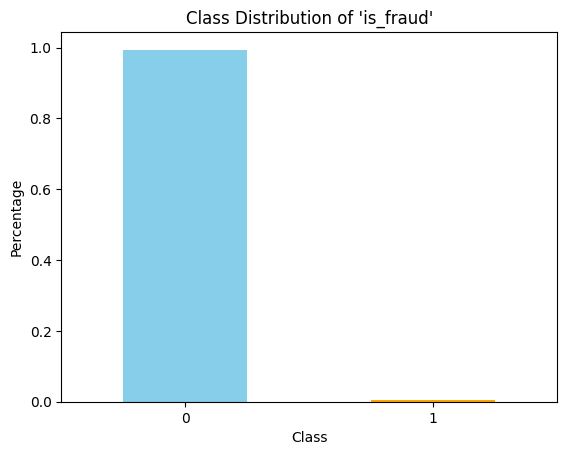

In [ ]:
# Plotting the class distribution
import matplotlib.pyplot as plt
class_distribution_in_percentage.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution of 'is_fraud'")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Converting two columns into datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
# Removing fraud_ from the merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                       merchant       category     amt      first     last  \
0          Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks   
1     Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill   
2                Lind-Buckridge  entertainment  220.11     Edward  Sanchez   
3  Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White   
4                 Keeling-Crist       misc_pos   41.96      Tyler   Garcia   

  gender                        street            city state    zip      lat  \
0      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
# Checking names of the merchants
df[['merchant']].head(15)

merchant
0           Rippin, Kub and Mann
1      Heller, Gutmann and Zieme
2                 Lind-Buckridge
3   Kutch, Hermiston and Farrell
4                  Keeling-Crist
5     Stroman, Hudson and Erdman
6                Rowe-Vandervort
7                 Corwin-Collins
8                     Herzog Ltd
9    Schoen, Kuphal and Nitzsche
10              Rutherford-Mertz
11               Kerluke-Abshire
12                   Lockman Ltd
13                     Kiehn Inc
14                   Beier-Hyatt

In [ ]:
# Value counts of the merchants
df['merchant'].value_counts()

merchant
Kilback LLC                       4403
Cormier LLC                       3649
Schumm PLC                        3634
Kuhn LLC                          3510
Boyer PLC                         3493
                                  ... 
Douglas, DuBuque and McKenzie      775
Treutel-King                       775
Medhurst, Labadie and Gottlieb     759
Reichert-Weissnat                  753
Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [ ]:
# Number of unique merchants
df['merchant'].nunique()

693

In [ ]:
# Dropping unwanted columns
df.drop(columns=['Unnamed: 0','first', 'last', 'street', 'trans_num', 'zip', 'unix_time'],inplace=True)

In [ ]:
df.head()

trans_date_trans_time            cc_num                      merchant  \
0   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 Keeling-Crist   

        category     amt gender            city state      lat      long  \
0       misc_net    4.97      F  Moravian Falls    NC  36.0788  -81.1781   
1    grocery_pos  107.23      F          Orient    WA  48.8878 -118.2105   
2  entertainment  220.11      M      Malad City    ID  42.1808 -112.2620   
3  gas_transport   45.00      M         Boulder    MT  46.2306 -112.1138   
4       misc_pos   41.96      M        Doe Hill    VA  38.4207  -79.4629   

   city_pop                                job        dob  merch_lat  \
0      3495          Psychologist, counselling 1988-03-09  36.011293   
1       149  Special educational needs teacher 1978-06-21  49.159047   
2      4154        Nature conservation officer 1962-01-19  43.150704   
3      1939                    Patent attorney 1967-01-12  47.034331   
4        99     Dance movement psychotherapist 1986-03-28  38.674999   

   merch_long  is_fraud  
0  -82.048315         0  
1 -118.186462         0  
2 -112.154481         0  
3 -112.561071         0  
4  -78.632459         0

# "distance" feature

In [ ]:
# Function to calculate distance between cardholder and merchant
def calculate_distance(X, lat_col, long_col, merch_lat_col, merch_long_col, new_column):

    # Calculate the distance (in kilometers) between two geographic coordinates using the Haversine formula.
    # Parameters:
    # - X: DataFrame containing the latitude and longitude columns.
    # - lat_col: Name of the column containing the latitude of the first location.
    # - long_col: Name of the column containing the longitude of the first location.
    # - merch_lat_col: Name of the column containing the latitude of the second location (merchant's location).
    # - merch_long_col: Name of the column containing the longitude of the second location (merchant's location).
    # - new_column: Name of the column where the calculated distance should be stored.
    # Returns:
    # - DataFrame with a new column containing the calculated distance in kilometers.

    # Convert latitudes and longitudes to radians
    lat1 = np.radians(X[lat_col])
    lon1 = np.radians(X[long_col])
    lat2 = np.radians(X[merch_lat_col])
    lon2 = np.radians(X[merch_long_col])

    # Haversine formula to calculate distance
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371  # Radius of the Earth in kilometers
    X[new_column] = R * c  # Distance in kilometers

    return X

# Apply the function to calculate distance for each transaction
df = calculate_distance(df, 'lat', 'long', 'merch_lat', 'merch_long', 'distance')

# Display the new 'distance' column
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

lat      long  merch_lat  merch_long    distance
0  36.0788  -81.1781  36.011293  -82.048315   78.597568
1  48.8878 -118.2105  49.159047 -118.186462   30.212176
2  42.1808 -112.2620  43.150704 -112.154481  108.206083
3  46.2306 -112.1138  47.034331 -112.561071   95.673231
4  38.4207  -79.4629  38.674999  -78.632459   77.556744

In [ ]:
# Number of unique cardholders
df['cc_num'].nunique()

983

# "customer_id" feature

In [ ]:
# Identify unique customers based on "cc_num"
df["customer_id"] = df["cc_num"].factorize()[0] + 1

In [ ]:
# Grouping the data based on "customer_id"
customers = df.groupby("customer_id")

In [ ]:
# Unique customers
df["customer_id"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# Displaying the first 10 unique customers with their cc_num
df[["customer_id", "cc_num"]].drop_duplicates().head(10)

customer_id            cc_num
0            1  2703186189652095
1            2      630423337322
2            3    38859492057661
3            4  3534093764340240
4            5   375534208663984
5            6  4767265376804500
6            7    30074693890476
7            8  6011360759745864
8            9  4922710831011201
9           10  2720830304681674

In [ ]:
# If I want to know the 'customer_id' of the customer about a specific transaction
customer_id = df[(df['city'] == 'Orient') & (df['amt'] == 107.23)]['customer_id'].unique()
print(customer_id)

[2]


In [ ]:
# Test on one customer_id to make sure the id lines up with the cc_num
df[df["customer_id"] == 2]

trans_date_trans_time        cc_num  \
1         2019-01-01 00:00:44  630423337322   
374       2019-01-01 04:57:58  630423337322   
486       2019-01-01 06:24:47  630423337322   
1357      2019-01-01 15:27:33  630423337322   
1504      2019-01-01 16:26:25  630423337322   
...                       ...           ...   
1295119   2020-06-20 22:33:52  630423337322   
1295183   2020-06-20 23:00:19  630423337322   
1295268   2020-06-20 23:38:17  630423337322   
1295569   2020-06-21 02:39:36  630423337322   
1296198   2020-06-21 07:59:13  630423337322   

                                  merchant       category     amt gender  \
1                Heller, Gutmann and Zieme    grocery_pos  107.23      F   
374               Streich, Hansen and Veum  gas_transport   61.39      F   
486                             Harber Inc  gas_transport   94.48      F   
1357           Romaguera, Wehner and Tromp      kids_pets   92.48      F   
1504                       Hermann-Gaylord       misc_pos    1.93      F   
...                                    ...            ...     ...    ...   
1295119                        Klein Group  entertainment    7.38      F   
1295183                        Streich Ltd           home   55.93      F   
1295268                    Kirlin and Sons  personal_care   77.89      F   
1295569  Kerluke, Considine and Macejkovic       misc_net    2.19      F   
1296198     Schaefer, Maggio and Daugherty  gas_transport   65.43      F   

           city state      lat      long  city_pop  \
1        Orient    WA  48.8878 -118.2105       149   
374      Orient    WA  48.8878 -118.2105       149   
486      Orient    WA  48.8878 -118.2105       149   
1357     Orient    WA  48.8878 -118.2105       149   
1504     Orient    WA  48.8878 -118.2105       149   
...         ...   ...      ...       ...       ...   
1295119  Orient    WA  48.8878 -118.2105       149   
1295183  Orient    WA  48.8878 -118.2105       149   
1295268  Orient    WA  48.8878 -118.2105       149   
1295569  Orient    WA  48.8878 -118.2105       149   
1296198  Orient    WA  48.8878 -118.2105       149   

                                       job        dob  merch_lat  merch_long  \
1        Special educational needs teacher 1978-06-21  49.159047 -118.186462   
374      Special educational needs teacher 1978-06-21  48.394218 -117.363563   
486      Special educational needs teacher 1978-06-21  49.513555 -117.819653   
1357     Special educational needs teacher 1978-06-21  48.491798 -117.466434   
1504     Special educational needs teacher 1978-06-21  49.002189 -117.977232   
...                                    ...        ...        ...         ...   
1295119  Special educational needs teacher 1978-06-21  49.119964 -118.925524   
1295183  Special educational needs teacher 1978-06-21  48.123408 -117.312908   
1295268  Special educational needs teacher 1978-06-21  49.476573 -118.761193   
1295569  Special educational needs teacher 1978-06-21  49.709594 -117.802287   
1296198  Special educational needs teacher 1978-06-21  49.416539 -117.329958   

         is_fraud    distance  customer_id  
1               0   30.212176            2  
374             0   82.972688            2  
486             0   75.152216            2  
1357            0   70.156246            2  
1504            0   21.260349            2  
...           ...         ...          ...  
1295119         0   58.196028            2  
1295183         0  107.688706            2  
1295268         0   76.734268            2  
1295569         0   96.053536            2  
1296198         0   86.933802            2  

[3030 rows x 18 columns]

In [ ]:
# Number of unique customers
df['customer_id'].nunique()

983

In [ ]:
# Dropping cc_num now, since it is not needed for modelling
df.drop(columns=["cc_num"], inplace=True)

In [ ]:
# Displaying 50 rows of the dataset
df.head(50)

trans_date_trans_time                               merchant  \
0    2019-01-01 00:00:18                   Rippin, Kub and Mann   
1    2019-01-01 00:00:44              Heller, Gutmann and Zieme   
2    2019-01-01 00:00:51                         Lind-Buckridge   
3    2019-01-01 00:01:16           Kutch, Hermiston and Farrell   
4    2019-01-01 00:03:06                          Keeling-Crist   
5    2019-01-01 00:04:08             Stroman, Hudson and Erdman   
6    2019-01-01 00:04:42                        Rowe-Vandervort   
7    2019-01-01 00:05:08                         Corwin-Collins   
8    2019-01-01 00:05:18                             Herzog Ltd   
9    2019-01-01 00:06:01            Schoen, Kuphal and Nitzsche   
10   2019-01-01 00:06:23                       Rutherford-Mertz   
11   2019-01-01 00:06:53                        Kerluke-Abshire   
12   2019-01-01 00:06:56                            Lockman Ltd   
13   2019-01-01 00:07:27                              Kiehn Inc   
14   2019-01-01 00:09:03                            Beier-Hyatt   
15   2019-01-01 00:09:20                       Schmidt and Sons   
16   2019-01-01 00:10:49                       Lebsack and Sons   
17   2019-01-01 00:10:58                           Mayert Group   
18   2019-01-01 00:11:14     Konopelski, Schneider and Hartmann   
19   2019-01-01 00:12:34            Schultz, Simonis and Little   
20   2019-01-01 00:13:08                           Bauch-Raynor   
21   2019-01-01 00:14:37                             Harris Inc   
22   2019-01-01 00:17:16                            Kling-Grant   
23   2019-01-01 00:17:40                          Pacocha-Bauch   
24   2019-01-01 00:18:06                              Lesch Ltd   
25   2019-01-01 00:18:07                          Kunde-Sanford   
26   2019-01-01 00:20:15                        Deckow-O'Conner   
27   2019-01-01 00:21:32                             Bruen-Yost   
28   2019-01-01 00:22:06                              Kunze Inc   
29   2019-01-01 00:22:18            Nitzsche, Kessler and Wolff   
30   2019-01-01 00:22:36            Kihn, Abernathy and Douglas   
31   2019-01-01 00:22:39              Heller, Gutmann and Zieme   
32   2019-01-01 00:22:44                         Torphy-Goyette   
33   2019-01-01 00:23:41                       Balistreri-Nader   
34   2019-01-01 00:23:58          Bahringer, Schoen and Corkery   
35   2019-01-01 00:25:46                           Hudson-Ratke   
36   2019-01-01 00:26:22                        Heidenreich PLC   
37   2019-01-01 00:27:45                        Halvorson Group   
38   2019-01-01 00:27:56                             Harber Inc   
39   2019-01-01 00:29:11           Mosciski, Gislason and Mertz   
40   2019-01-01 00:30:49  Christiansen, Goyette and Schamberger   
41   2019-01-01 00:31:01                               Howe Ltd   
42   2019-01-01 00:31:51                    Ledner-Pfannerstill   
43   2019-01-01 00:32:15                            Lockman Ltd   
44   2019-01-01 00:32:15                          Koepp-Witting   
45   2019-01-01 00:32:47                              Doyle Ltd   
46   2019-01-01 00:33:51         Schaefer, Maggio and Daugherty   
47   2019-01-01 00:34:10                          Stracke-Lemke   
48   2019-01-01 00:36:12          Mosciski, Ziemann and Farrell   
49   2019-01-01 00:36:58                      Cartwright-Harris   

         category     amt gender                      city state      lat  \
0        misc_net    4.97      F            Moravian Falls    NC  36.0788   
1     grocery_pos  107.23      F                    Orient    WA  48.8878   
2   entertainment  220.11      M                Malad City    ID  42.1808   
3   gas_transport   45.00      M                   Boulder    MT  46.2306   
4        misc_pos   41.96      M                  Doe Hill    VA  38.4207   
5   gas_transport   94.63      F                    Dublin    PA  40.3750   
6     grocery_net   44.54      F              

# Features for Unique behavior

## Features

Now that I have each customer uniquely identified, and assigned a customer_id, I would like to map out customer behavior specific to each customer. The features that I will be creating are:

## 1. Time-Based Features:

- **time_since_last_transaction**: Time gap between a customer’s transactions for the same "cc_num". <br>Purpose: Fraudsters often make multiple rapid transactions in a short time.

- **hour_of_day_std_dev**: Standard deviation of transaction times for a customer. <br>Purpose: If a customer usually transacts in the afternoon but suddenly makes purchases at 2 AM, it could be fraud.

- **trans_day_of_week**: Helps identify if the transaction occurred on a weekday or weekend. Fraudulent transactions often occur at unusual times. <br>Purpose: Fraudsters may prefer certain days (e.g., weekends when monitoring is low).

- **num_transactions_last_7d**: Number of transactions a customer makes per week. <br>Purpose: Sudden spikes in weekly transactions could indicate fraud.

- **transaction_frequency_per_day**: Number of transactions a customer makes per day. If you want to detect long-term deviations from a customer's normal spending pattern. <br>Purpose: Unusually high transaction frequency may indicate fraud (for pattern deviations over time).

- **num_transactions_last_24h**: Count of transactions made by the customer in the last 24 hours. If you want to catch sudden transaction bursts. <br>Purpose: Unusually high transaction frequency could indicate fraud (for sudden transaction spikes).

- **num_transactions_last_1h**: Count of transactions made by the customer in last hour. <br>Purpose: A large number of transactions in a short period can indicate fraud.

## 2. Location-Based Features:

- **avg_transaction_distance**: Average distance between customer and merchant across all transactions. <br>Purpose: Customers tend to shop within a certain distance; large deviations might indicate fraud. Helps detect usual spending behavior in terms of location.

- **90th_dist**: Shows the 90th percentile of transaction distances for a customer. <br>Purpose: Helping flag fraud when a transaction happens beyond threshold value (90th percentile).

- **above_avg_distance**: Flag indicating transaction distances above the customer’s average. (1 or 0). <br>Purpose: Transactions farther than usual can indicate fraud. This feature allows a simple Yes/No flag that makes fraud detection easier.

- **above_90_distance**: Flag indicating transaction distances above the 90th percentile. (1 or 0). <br>Purpose: Transactions at extreme distances (above the 90th percentile) can suggest fraudulent activity. This feature allows a simple Yes/No flag that makes fraud detection easier.

- **home_state_vs_merchant_state**: Whether the transaction happened in the same state or not. <br>Purpose: Transactions far from the customer's home state are suspicious.

## 3. Customer Behavior Features:

- **unique_merchants_last_30d**: Counts the number of unique merchants a customer transacted with in the last 30 days. <br>Purpose: Fraudsters often spread-out transactions across many merchants to avoid detection. A sudden spike in new merchants could indicate fraud.

## 4. Merchant-Specific Features:

- **repeat_merchant**: Number of times a customer has transacted with the same merchant before. <br>Purpose: Fraudsters often use new merchants.

- **new_merchant_flag**: 1 if the customer has never transacted with this merchant before, else 0. <br>Purpose: First-time transactions with merchants can be riskier.

- **is_high_risk_merchant**: Flag merchants historically linked to high fraud rates. <br>Purpose: Some merchants have a history of fraud.

## 5. Spending-Related Features:

- **avg_spending_per_week**: Average amount spent per week by a customer. <br>Purpose: Sudden increase in spending could indicate fraud. Based on weekly spending.

- **avg_amt_per_day**: Average transaction amount per day by a customer. <br>Purpose: Tracks daily spending patterns to detect deviations. Based on daily spending.

- **avg_trans_amt**: The average amount per transaction across all transactions. <br>Purpose: Captures the typical transaction size of a customer. Based on each transaction (lifetime average).

- **transaction_amt_std_dev**: Standard deviation of transaction amounts per customer. <br>Purpose: Fraudulent transactions often have significantly different amounts from a customer’s usual behavior. Standard deviation helps detect large outlier transactions. <br>Calculated Based On: "amt"

- **90th_amt**: 90th percentile of the customer’s transaction amounts, which helps spot sudden high-value fraud. <br>Purpose: Useful because fraud often involves amounts far above a customer’s usual behavior. <br>Calculated Based On: "amt"

- **above_avg_amt**: Compares the current transaction amount to the customer’s usual behavior/above the customer's average. (1 or 0). <br>Purpose: Transactions above average spending could suggest fraud. This feature allows a simple Yes/No flag that makes fraud detection easier. <br>Compared with: "avg_trans_amt"

- **above_90_amt**: Compares the current transaction amount to the customer’s usual behavior/above the 90th percentile. (1 or 0). <br>Purpose: Large transactions relative to the 90th percentile might be fraudulent. This feature allows a simple Yes/No flag that makes fraud detection easier. <br>Compared with: "90th_amt"

- **is_rounded_amt**: Flags transactions with rounded amounts. <br>Purpose: Fraudulent transactions often involve rounded amounts (e.g., $100, $50, $500).

## 6. Demographic Features:

- **age**: Derived from "dob". Can be used to analyze spending behavior differences across age groups. <br>Purpose: Younger and older age groups may have different fraud risks.

- **city_population_risk**: Relative risk score based on city population. <br>Purpose: Smaller cities might have different fraud patterns than larger cities.

In [ ]:
# Sorting the data based on "customer_id" and "trans_date_trans_time"
df = df.sort_values(by=['customer_id', 'trans_date_trans_time'])
df.head()

trans_date_trans_time                    merchant       category     amt  \
0      2019-01-01 00:00:18        Rippin, Kub and Mann       misc_net    4.97   
1565   2019-01-01 16:53:34              Ruecker-Mayert      kids_pets  114.79   
2299   2019-01-01 23:02:37            Pacocha-Weissnat      kids_pets   16.55   
3606   2019-01-03 01:40:38                    Kuhn LLC       misc_net   27.70   
4227   2019-01-03 15:24:11  Nicolas, Hills and McGlynn  entertainment   43.72   

     gender            city state      lat     long  city_pop  \
0         F  Moravian Falls    NC  36.0788 -81.1781      3495   
1565      F  Moravian Falls    NC  36.0788 -81.1781      3495   
2299      F  Moravian Falls    NC  36.0788 -81.1781      3495   
3606      F  Moravian Falls    NC  36.0788 -81.1781      3495   
4227      F  Moravian Falls    NC  36.0788 -81.1781      3495   

                            job        dob  merch_lat  merch_long  is_fraud  \
0     Psychologist, counselling 1988-03-09  36.011293  -82.048315         0   
1565  Psychologist, counselling 1988-03-09  35.083586  -80.625951         0   
2299  Psychologist, counselling 1988-03-09  35.532409  -82.170017         0   
3606  Psychologist, counselling 1988-03-09  35.315851  -80.666723         0   
4227  Psychologist, counselling 1988-03-09  36.956094  -80.343520         0   

        distance  customer_id  
0      78.597568            1  
1565  121.405859            1  
2299  108.131953            1  
3606   96.589551            1  
4227  122.793623            1

In [ ]:
# # Merchant Risk Feature
# merchant_fraud_rates = df.groupby("merchant")["is_fraud"].mean()
# fraud_threshold = merchant_fraud_rates.quantile(0.90)  # Top 10% fraud rate threshold
# high_risk_merchants = merchant_fraud_rates[merchant_fraud_rates > fraud_threshold].index
# df["is_high_risk_merchant"] = df["merchant"].isin(high_risk_merchants).astype(int)

In [ ]:
# Filters customers with single transaction for some features
single_transaction_customers = df.groupby('customer_id')['trans_date_trans_time'].count()
single_transaction_customers = single_transaction_customers[single_transaction_customers == 1]
single_transaction_customers

Series([], Name: trans_date_trans_time, dtype: int64)

# Feature Engineering

## 1a: Time-Based Features


In [ ]:
# Time-Based Features
df['time_since_last_transaction'] = df.groupby('customer_id')['trans_date_trans_time'].diff().dt.total_seconds()
df['time_since_last_transaction'] = df['time_since_last_transaction'].fillna(0)  # Handling NaNs for first transactions of each customer
df['hour'] = df['trans_date_trans_time'].dt.hour
df['hour_std_dev'] = df.groupby('customer_id')['hour'].transform("std")  # Use string instead of np.std
df['week'] = df['trans_date_trans_time'].dt.weekday
df['month'] = df['trans_date_trans_time'].dt.month
df['transaction_frequency_per_day'] = df.groupby(['customer_id', df['trans_date_trans_time'].dt.date])['trans_date_trans_time'].transform('count')

### Tests for Time-Based features

In [ ]:
# Calculating time span of the dataset for 'month' feature
time_span = df['trans_date_trans_time'].max() - df['trans_date_trans_time'].min()
print(f"Dataset spans: {time_span.days} days ({time_span.days / 365:.2f} years)")

Dataset spans: 537 days (1.47 years)


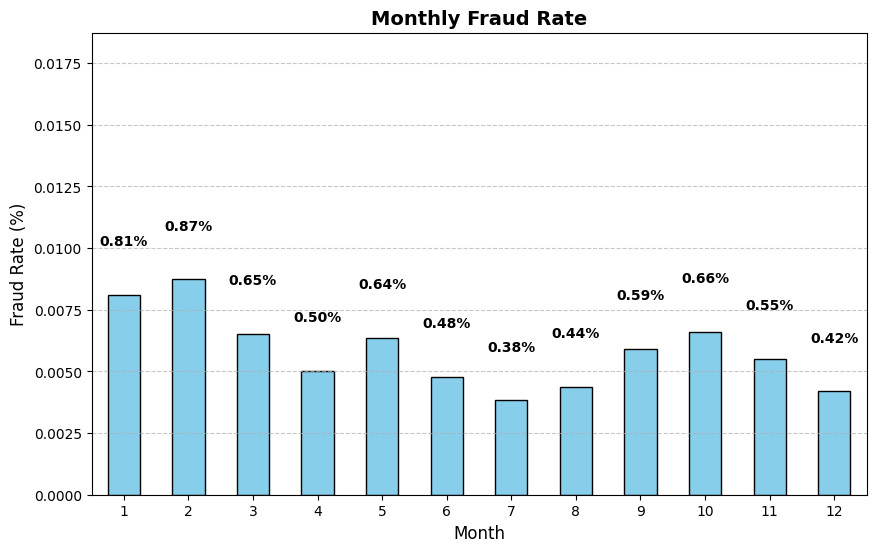

In [ ]:
# Checking fraud distribution by month

# Group by month and calculate fraud percentage
monthly_fraud_rate = df.groupby(df['trans_date_trans_time'].dt.month)['is_fraud'].mean()

# Plot as a bar chart
plt.figure(figsize=(10, 6))
monthly_fraud_rate.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Fraud Rate (%)", fontsize=12)
plt.title("Monthly Fraud Rate", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, v in enumerate(monthly_fraud_rate):
    plt.text(i, v + 0.002, f"{v:.2%}", ha='center', fontsize=10, fontweight="bold")

# Improve layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, monthly_fraud_rate.max() + 0.01)

# Show the plot
plt.show()

In [ ]:
# Performing a Statistical Test to check if the 'month' feature significantly affects fraud
import scipy.stats as stats

# Extract fraud rates per month
fraud_rates_by_month = [df[df['trans_date_trans_time'].dt.month == m]['is_fraud'] for m in range(1, 13)]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*fraud_rates_by_month)

print(f"ANOVA p-value: {p_value:.5f}")

# Decision:
if p_value < 0.05:
    print("Month significantly affects fraud. Keep 'month'.")
else:
    print("No significant difference in fraud across months. Drop 'month'.")

ANOVA p-value: 0.00000
Month significantly affects fraud. Keep 'month'.


## 1b: More Time-based features

In [ ]:
# Time-Based Features
# Function to count transactions in the last N days for each customer
def count_transactions_last_n_days(transactions, days):
    return transactions.apply(lambda t: ((transactions >= t - pd.Timedelta(days=days)) & (transactions <= t)).sum())

# Apply function to count past transactions
df['num_transactions_last_7d'] = df.groupby('customer_id')['trans_date_trans_time'].transform(lambda x: count_transactions_last_n_days(x, 7))
df['num_transactions_last_24h'] = df.groupby('customer_id')['trans_date_trans_time'].transform(lambda x: count_transactions_last_n_days(x, 1))
df['num_transactions_last_1h'] = df.groupby('customer_id')['trans_date_trans_time'].transform(lambda x: count_transactions_last_n_days(x, 1/24))

## 2: Location-Based Features

In [ ]:
# Location-Based Features
df['avg_transaction_distance'] = df.groupby('customer_id')['distance'].transform("mean")
df['90th_dist'] = df.groupby('customer_id')['distance'].transform(lambda x: np.percentile(x, 90))
df['above_avg_distance'] = (df['distance'] > df['avg_transaction_distance']).astype(int)
df['above_90_distance'] = (df['distance'] > df['90th_dist']).astype(int)
# df['home_state_vs_merchant_state'] = (df['state'] != df['merchant_state']).astype(int)

### Tests for Location-Based features

In [ ]:
# Test whether to keep 'above_avg_distance' or drop it
# Compute correlation with fraud label
corr_avg = df[['above_avg_distance', 'is_fraud']].corr().iloc[0, 1]
corr_90 = df[['above_90_distance', 'is_fraud']].corr().iloc[0, 1]

print(f"Correlation with fraud label:")
print(f"above_avg_distance: {corr_avg:.4f}")
print(f"above_90_distance: {corr_90:.4f}")

# Higher correlation (closer to 1 or -1) suggests a stronger relationship with fraud.
# Lower correlation (closer to 0) suggests the feature might not be useful.

Correlation with fraud label:
above_avg_distance: -0.0004
above_90_distance: 0.0002


In [ ]:
# Test whether to keep 'above_avg_distance' or drop it
# Check if 'above_avg_distance' will be too volatile:
# Calculating mean, standard deviation and 90th percentile of distance for each customer
df.groupby('customer_id')['distance'].agg(['mean', 'std', lambda x: np.percentile(x, 90)]).head(50)

# If mean fluctuates too much per customer, it means above_avg_distance is not reliable.
# If the 90th percentile remains stable, it confirms above_90_distance is better.

mean        std  <lambda_0>
customer_id                                  
1            77.960192  29.923727  115.367543
2            71.792546  28.108263  108.720417
3            74.075326  29.040802  110.783479
4            71.702172  29.517401  110.157135
5            75.234342  29.532859  112.982154
6            77.146437  29.423694  114.869038
7            75.599613  28.883278  112.470975
8            76.266932  29.825507  113.586391
9            75.987965  28.135064  111.646863
10           77.396227  28.982751  112.883538
11           74.635498  29.776763  112.251397
12           75.006191  28.537971  111.527427
13           79.988907  28.892659  115.809771
14           74.438519  29.072173  112.372958
15           77.881158  29.822634  115.780729
16           74.172609  29.481407  110.482378
17           76.626599  29.083940  113.496193
18           76.410562  27.670186  110.625805
19           73.538443  28.648254  110.314385
20           74.593348  29.052914  111.291479
21           73.990994  28.538922  110.307261
22           75.726325  29.230076  112.505302
23           75.576912  28.594784  111.004993
24           78.632493  29.236230  115.029686
25           73.400688  28.850034  110.204934
26           78.146741  29.408444  114.598449
27           74.688162  28.768931  111.267545
28           74.155245  28.262715  110.919824
29           81.465738  31.281509  118.929059
30           75.881929  29.159773  111.472458
31           74.808141  27.744437  110.861498
32           77.166893  29.125715  114.476174
33           72.817168  28.339387  110.270314
34           79.553468  29.711275  116.553433
35           76.188475  29.222969  112.929284
36           75.920344  29.098125  112.401544
37           75.856846  28.383293  111.766885
38           78.613177  29.787394  115.956790
39           76.097852  28.789198  111.211418
40           75.371794  29.430251  113.077517
41           75.100080  28.459411  111.196745
42           73.691016  28.022200  111.118471
43           76.028604  28.956900  112.746430
44           73.571984  29.351427  112.149353
45           81.864154  30.494613  119.142312
46           78.232713  29.277142  113.530710
47           71.824553  28.274072  108.827351
48           78.012025  28.024074  112.141926
49           79.134147  29.253642  114.597773
50           78.415338  29.389102  114.366732

In [ ]:
# Test whether to keep 'above_avg_distance' or drop it
df['rolling_mean_distance'] = df.groupby('customer_id')['distance'].transform(lambda x: x.expanding().mean())

# Compare first 10 transactions of a random customer
customer_sample = df[df['customer_id'] == df['customer_id'].sample(1).iloc[0]].sort_values('trans_date_trans_time')
print(customer_sample[['distance', 'rolling_mean_distance']].head(10))

# If the rolling mean changes a lot, it confirms that above_avg_distance is unstable.

        distance  rolling_mean_distance
500   114.895616             114.895616
1995   77.537544              96.216580
2263  104.289176              98.907445
2573   94.399540              97.780469
3129   33.478837              84.920142
4005  106.962181              88.593815
4097   86.411786              88.282097
4647   84.175643              87.768790
4914  129.351407              92.389081
5669   50.513883              88.201561


In [ ]:
# Test whether to keep 'above_avg_distance' or drop it
df['above_avg_distance'].mean()

#  If it's close to 50% or higher, it means this feature isn't capturing real anomalies—it's just flagging too many normal transactions.

0.5279472496963387

In [ ]:
# Test whether to keep 'above_avg_distance' or drop it
df[['above_avg_distance', 'above_90_distance']].corr()

# If they are highly correlated, we can drop 'above_avg_distance' because 'above_90_distance' is a more stable representation of anomalies.

above_avg_distance  above_90_distance
above_avg_distance            1.000000           0.315638
above_90_distance             0.315638           1.000000

In [ ]:
# Dropping 'rolling_mean_distance' column
df.drop(columns=['rolling_mean_distance'], inplace=True)

## 3: Merchant-Specific Features

In [ ]:
# Merchant-Specific Features
df['repeat_merchant'] = df.groupby(['customer_id', 'merchant']).cumcount()
df['new_merchant_flag'] = (df['repeat_merchant'] == 0).astype(int)

### Tests for Merchant-Specific features

In [ ]:
# Verification 1: Checking 'repeat_merchant', if the code is correct
df[df['customer_id'] == 1][['customer_id', 'merchant', 'repeat_merchant']].sort_values(['customer_id', 'merchant'])

# Expected Result: If 'repeat_merchant' is working correctly, the first transaction with each merchant should be 0, the second should be 1, the third should be 2, and so on.

customer_id                    merchant  repeat_merchant
340218             1               Abbott-Rogahn                0
356680             1               Abbott-Rogahn                1
460652             1               Abbott-Rogahn                2
612497             1               Abbott-Rogahn                3
239127             1          Abernathy and Sons                0
...              ...                         ...              ...
171852             1  Zemlak, Tillman and Cremin                0
1230325            1  Zemlak, Tillman and Cremin                1
461915             1              Ziemann-Waters                0
141961             1      Zieme, Bode and Dooley                0
1173480            1                  Zulauf LLC                0

[2028 rows x 3 columns]

In [ ]:
# Verification 2: Checking 'new_merchant_flag', if the code is correct
df[df['customer_id'] == 1][['customer_id', 'merchant', 'repeat_merchant', 'new_merchant_flag']].sort_values(['customer_id', 'merchant'])

# Expected Result: 'new_merchant_flag' should be 1 when repeat_merchant == 0, and 0 otherwise.

customer_id                    merchant  repeat_merchant  \
340218             1               Abbott-Rogahn                0   
356680             1               Abbott-Rogahn                1   
460652             1               Abbott-Rogahn                2   
612497             1               Abbott-Rogahn                3   
239127             1          Abernathy and Sons                0   
...              ...                         ...              ...   
171852             1  Zemlak, Tillman and Cremin                0   
1230325            1  Zemlak, Tillman and Cremin                1   
461915             1              Ziemann-Waters                0   
141961             1      Zieme, Bode and Dooley                0   
1173480            1                  Zulauf LLC                0   

         new_merchant_flag  
340218                   1  
356680                   0  
460652                   0  
612497                   0  
239127                   1  
...                    ...  
171852                   1  
1230325                  0  
461915                   1  
141961                   1  
1173480                  1  

[2028 rows x 4 columns]

## 4: Customer Behavior Features

In [ ]:
# Customer Behavior Features
df['unique_merchants_last_30d'] = df.apply(lambda row: df[(df['customer_id'] == row['customer_id']) & (df['trans_date_trans_time'] > row['trans_date_trans_time'] - pd.Timedelta(days=30)) & (df['trans_date_trans_time'] < row['trans_date_trans_time'])]['merchant'].nunique(), axis=1)

### Tests for Customer Behavior features

In [ ]:
# Check If First Transactions Have a Non-Zero Value
# The first transaction of any customer should always be 0 (since there are no past transactions). Let's check:

# Get the first transaction for each customer
first_transactions = df.sort_values(['customer_id', 'trans_date_trans_time']).groupby('customer_id').first()

# Check their 'unique_merchants_last_30d' values
print(first_transactions[['trans_date_trans_time', 'unique_merchants_last_30d']])

# Expected: If correctly computed, all first transactions should have 'unique_merchants_last_30d' = 0.

            trans_date_trans_time  unique_merchants_last_30d
customer_id                                                 
1             2019-01-01 00:00:18                          0
2             2019-01-01 00:00:44                          0
3             2019-01-01 00:00:51                          0
4             2019-01-01 00:01:16                          0
5             2019-01-01 00:03:06                          0
...                           ...                        ...
979           2020-05-11 01:29:31                          0
980           2020-05-12 00:46:00                          0
981           2020-05-28 22:33:06                          0
982           2020-06-07 22:10:31                          0
983           2020-06-14 01:56:32                          0

[983 rows x 2 columns]


In [ ]:
# Ensure First Transactions Have a 0 Value
print(df[df['unique_merchants_last_30d'] == 0].head())  # Should be first transactions for customers

  trans_date_trans_time                      merchant       category     amt  \
0   2019-01-01 00:00:18          Rippin, Kub and Mann       misc_net    4.97   
1   2019-01-01 00:00:44     Heller, Gutmann and Zieme    grocery_pos  107.23   
2   2019-01-01 00:00:51                Lind-Buckridge  entertainment  220.11   
3   2019-01-01 00:01:16  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   2019-01-01 00:03:06                 Keeling-Crist       misc_pos   41.96   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   
2      M      Malad City    ID  42.1808 -112.2620      4154   
3      M         Boulder    MT  46.2306 -112.1138      1939   
4      M        Doe Hill    VA  38.4207  -79.4629        99   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.04

In [ ]:
# Check for different customers manually
# Pick a specific customer and check their transaction history:
customer_id_sample = 1  # Change this to any customer ID
df[df['customer_id'] == customer_id_sample][['trans_date_trans_time', 'merchant', 'unique_merchants_last_30d']].sort_values('trans_date_trans_time')

# Expected:
# 'unique_merchants_last_30d' starts at 0.
# It increases when they visit new merchants.
# If they return to the same merchants, the count stays the same.

trans_date_trans_time                    merchant  \
0         2019-01-01 00:00:18        Rippin, Kub and Mann   
1565      2019-01-01 16:53:34              Ruecker-Mayert   
2299      2019-01-01 23:02:37            Pacocha-Weissnat   
3606      2019-01-03 01:40:38                    Kuhn LLC   
4227      2019-01-03 15:24:11  Nicolas, Hills and McGlynn   
...                       ...                         ...   
1293109   2020-06-20 02:02:33                  Herzog Ltd   
1294921   2020-06-20 20:57:37                Harris Group   
1295472   2020-06-21 01:43:26                 Huels-Nolan   
1295630   2020-06-21 03:09:56             Rowe-Vandervort   
1295986   2020-06-21 06:08:15        Jaskolski-Vandervort   

         unique_merchants_last_30d  
0                                0  
1565                             1  
2299                             2  
3606                             3  
4227                             4  
...                            ...  
1293109                        106  
1294921                        106  
1295472                        105  
1295630                        106  
1295986                        107  

[2028 rows x 3 columns]

In [ ]:
# Compare with a manual count
# Pick a customer and manually count the unique merchants in the last 30 days:
customer_id_sample = 1  # Choose a customer
df_sample = df[df['customer_id'] == customer_id_sample].sort_values('trans_date_trans_time')

for idx, row in df_sample.iterrows():
    merchants_past_30d = df_sample[(df_sample['trans_date_trans_time'] > row['trans_date_trans_time'] - pd.Timedelta(days=30)) &
                                   (df_sample['trans_date_trans_time'] < row['trans_date_trans_time'])]['merchant'].nunique()
    print(f"Transaction Date: {row['trans_date_trans_time']}, Computed: {row['unique_merchants_last_30d']}, Expected: {merchants_past_30d}")

# Expected: The computed values in your dataset should match this manual check.

Transaction Date: 2019-01-01 00:00:18, Computed: 0, Expected: 0
Transaction Date: 2019-01-01 16:53:34, Computed: 1, Expected: 1
Transaction Date: 2019-01-01 23:02:37, Computed: 2, Expected: 2
Transaction Date: 2019-01-03 01:40:38, Computed: 3, Expected: 3
Transaction Date: 2019-01-03 15:24:11, Computed: 4, Expected: 4
Transaction Date: 2019-01-04 06:18:05, Computed: 5, Expected: 5
Transaction Date: 2019-01-04 08:59:57, Computed: 6, Expected: 6
Transaction Date: 2019-01-04 14:19:03, Computed: 7, Expected: 7
Transaction Date: 2019-01-04 20:55:05, Computed: 8, Expected: 8
Transaction Date: 2019-01-04 21:33:13, Computed: 9, Expected: 9
Transaction Date: 2019-01-05 12:36:51, Computed: 10, Expected: 10
Transaction Date: 2019-01-06 11:37:54, Computed: 11, Expected: 11
Transaction Date: 2019-01-06 16:53:35, Computed: 12, Expected: 12
Transaction Date: 2019-01-06 17:25:24, Computed: 13, Expected: 13
Transaction Date: 2019-01-07 05:35:50, Computed: 14, Expected: 14
Transaction Date: 2019-01-07 1

In [ ]:
# Sorting by transaction time per customer
# Ensure that for each customer_id, the first transaction (earliest trans_date_trans_time) has unique_merchants_last_30d = 0.
df_sorted = df.sort_values(by=['customer_id', 'trans_date_trans_time'])
first_transactions = df_sorted.groupby('customer_id').first()
print(first_transactions[['trans_date_trans_time', 'unique_merchants_last_30d']].head())

# This should confirm that every customer's first transaction has 'unique_merchants_last_30d' = 0.

            trans_date_trans_time  unique_merchants_last_30d
customer_id                                                 
1             2019-01-01 00:00:18                          0
2             2019-01-01 00:00:44                          0
3             2019-01-01 00:00:51                          0
4             2019-01-01 00:01:16                          0
5             2019-01-01 00:03:06                          0


In [ ]:
# Checking for any cases where the first transaction is not 0
first_transactions_with_nonzero = first_transactions[first_transactions['unique_merchants_last_30d'] != 0]
print(first_transactions_with_nonzero)

# If this returns any rows, it indicates an issue where the first transaction for some customers is incorrectly assigned a nonzero value.

Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, gender, city, state, lat, long, city_pop, job, dob, merch_lat, merch_long, is_fraud, distance, time_since_last_transaction, hour, hour_std_dev, week, month, transaction_frequency_per_day, num_transactions_last_7d, num_transactions_last_24h, num_transactions_last_1h, avg_transaction_distance, 90th_dist, above_avg_distance, above_90_distance, repeat_merchant, new_merchant_flag, unique_merchants_last_30d]
Index: []


## 5: Spending-Related Features

In [ ]:
# Spending-Related Features
df['avg_spending_per_week'] = df.groupby('customer_id').apply(lambda x: x['amt'].expanding(min_periods=1).mean()).reset_index(level=0, drop=True)
df['avg_amt_per_day'] = df.groupby(['customer_id', df['trans_date_trans_time'].dt.date])['amt'].transform('mean')
df['avg_trans_amt'] = df.groupby('customer_id')['amt'].transform("mean")
df['transaction_amt_std_dev'] = df.groupby('customer_id')['amt'].transform("std")
df['90th_amt'] = df.groupby('customer_id')['amt'].transform(lambda x: np.percentile(x, 90))
df['above_avg_amt'] = (df['amt'] > df['avg_trans_amt']).astype(int)
df['above_90_amt'] = (df['amt'] > df['90th_amt']).astype(int)
df['is_rounded_amt'] = (df['amt'] % 10 == 0).astype(int)

<ipython-input-69-525a1ddcaacf>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['avg_spending_per_week'] = df.groupby('customer_id').apply(lambda x: x['amt'].expanding(min_periods=1).mean()).reset_index(level=0, drop=True)


### Tests for Spending-Related features

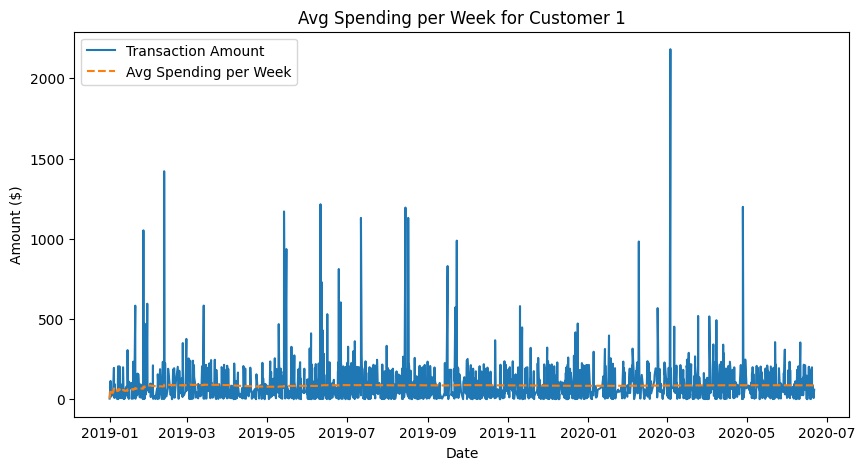

In [ ]:
# Validating 'avg_spending_per_week'
# Plot the Feature Over Time
import matplotlib.pyplot as plt

customer_id = df['customer_id'].iloc[0]  # Pick any customer
subset = df[df['customer_id'] == 1]

plt.figure(figsize=(10,5))
plt.plot(subset['trans_date_trans_time'], subset['amt'], label='Transaction Amount')
plt.plot(subset['trans_date_trans_time'], subset['avg_spending_per_week'], label='Avg Spending per Week', linestyle='dashed')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.title(f"Avg Spending per Week for Customer {customer_id}")
plt.show()

# This will help visually confirm whether the rolling average is correct.

In [ ]:
# Validating 'avg_spending_per_week'
# Check if the values make sense based on 7-day window.
df[['trans_date_trans_time', 'customer_id', 'amt', 'avg_amt_per_day', 'week', 'avg_spending_per_week']].head(50)

trans_date_trans_time  customer_id     amt  avg_amt_per_day  week  \
0       2019-01-01 00:00:18            1    4.97        45.436667     1   
1565    2019-01-01 16:53:34            1  114.79        45.436667     1   
2299    2019-01-01 23:02:37            1   16.55        45.436667     1   
3606    2019-01-03 01:40:38            1   27.70        35.710000     3   
4227    2019-01-03 15:24:11            1   43.72        35.710000     3   
5044    2019-01-04 06:18:05            1  196.25        82.288000     4   
5175    2019-01-04 08:59:57            1   77.89        82.288000     4   
5493    2019-01-04 14:19:03            1    9.08        82.288000     4   
5999    2019-01-04 20:55:05            1   94.92        82.288000     4   
6048    2019-01-04 21:33:13            1   33.30        82.288000     4   
6831    2019-01-05 12:36:51            1   50.39        50.390000     5   
8437    2019-01-06 11:37:54            1    4.05        18.540000     6   
8946    2019-01-06 16:53:35            1    6.01        18.540000     6   
8999    2019-01-06 17:25:24            1   45.56        18.540000     6   
10136   2019-01-07 05:35:50            1   67.67        75.242500     0   
10479   2019-01-07 10:08:01            1  205.79        75.242500     0   
10782   2019-01-07 13:14:30            1    1.40        75.242500     0   
11054   2019-01-07 15:27:18            1   26.11        75.242500     0   
12678   2019-01-08 07:40:24            1   61.93        63.030000     1   
12853   2019-01-08 09:50:41            1   47.93        63.030000     1   
12981   2019-01-08 11:40:25            1  205.85        63.030000     1   
13375   2019-01-08 15:10:27            1   39.00        63.030000     1   
13983   2019-01-08 20:23:22            1   14.10        63.030000     1   
14337   2019-01-08 23:22:44            1    9.37        63.030000     1   
15368   2019-01-09 20:39:09            1   25.58        41.990000     2   
15503   2019-01-09 22:55:02            1    8.02        41.990000     2   
15551   2019-01-09 23:35:26            1   92.37        41.990000     2   
16246   2019-01-10 15:08:28            1   34.53        21.685000     3   
16687   2019-01-10 21:47:19            1    8.84        21.685000     3   
17104   2019-01-11 05:34:19            1  200.03        67.208000     4   
17573   2019-01-11 14:10:03            1   66.86        67.208000     4   
17590   2019-01-11 14:22:33            1   22.39        67.208000     4   
17618   2019-01-11 14:45:58            1    3.32        67.208000     4   
18126   2019-01-11 22:03:46            1   43.44        67.208000     4   
18376   2019-01-12 02:19:44            1    2.00        23.373333     5   
19269   2019-01-12 17:58:25            1    8.07        23.373333     5   
19691   2019-01-12 23:37:30            1   60.05        23.373333     5   
20802   2019-01-13 15:21:42            1   77.92        77.920000     6   
22171   2019-01-14 05:50:29            1   79.20       104.123333     0   
22809   2019-01-14 13:37:04            1   22.61       104.123333     0   
22943   2019-01-14 14:36:56            1   22.20       104.123333     0   
23137   2019-01-14 16:03:39            1  306.84       104.123333     0   
23338   2019-01-14 17:40:47            1  180.30       104.123333     0   
24013   2019-01-14 22:48:58            1   13.59       104.123333     0   
24254   2019-01-15 01:36:16            1   49.17        55.455000     1   
25385   2019-01-15 15:02:17            1    3.24        55.455000     1   
25757   2019-01-15 18:05:49            1   59.36        55.455000     1   
25929   2019-01-15 19:28:01            1  110.05        55.455000     1   
27165   2019-01-16 14:45:07            1   89.40        89.400000     2   
28390   2019-01-17 15:25:20            1   65.44        65.100000     3   

       avg_spending_per_week  
0                   4.970000  
1565               59.880000  
2299               45.436667  
3606               41.002500  
4227               41.546

In [ ]:
# Validating 'avg_spending_per_week'
# Manually Check for a few Customers
customer_id = df['customer_id'].iloc[0]  # Pick the first customer
customer_data = df[df['customer_id'] == 1].copy()
customer_data = customer_data.sort_values('trans_date_trans_time')  # Ensure chronological order

# This filters the data to contain transactions only for the selected customer.

In [ ]:
# Validating 'avg_spending_per_week'
# Manually computes the last 7-day rolling average for each transaction

def manual_rolling_avg(transaction_time, customer_data):
    past_week = customer_data[
        (customer_data['trans_date_trans_time'] > transaction_time - pd.Timedelta(days=7)) &
        (customer_data['trans_date_trans_time'] <= transaction_time)
    ]
    return past_week['amt'].mean()

# Apply this function manually for each transaction
customer_data['manual_avg_spending_per_week'] = customer_data['trans_date_trans_time'].apply(
    lambda x: manual_rolling_avg(x, customer_data)
)

# For each transaction, we need to check all transactions that occurred within the last 7 days and take the average. We will then compare it to 'avg_spending_per_week'.

In [ ]:
#Now, compare the manually computed 'manual_avg_spending_per_week' with 'avg_spending_per_week' from the original dataset

comparison = customer_data[['trans_date_trans_time', 'amt', 'avg_spending_per_week', 'manual_avg_spending_per_week']]
print(comparison.head(20))

# If the values match closely, then the 'avg_spending_per_week' feature is correct. If they are different, it means there's an issue with how the rolling average is computed.

      trans_date_trans_time     amt  avg_spending_per_week  \
0       2019-01-01 00:00:18    4.97               4.970000   
1565    2019-01-01 16:53:34  114.79              59.880000   
2299    2019-01-01 23:02:37   16.55              45.436667   
3606    2019-01-03 01:40:38   27.70              41.002500   
4227    2019-01-03 15:24:11   43.72              41.546000   
5044    2019-01-04 06:18:05  196.25              67.330000   
5175    2019-01-04 08:59:57   77.89              68.838571   
5493    2019-01-04 14:19:03    9.08              61.368750   
5999    2019-01-04 20:55:05   94.92              65.096667   
6048    2019-01-04 21:33:13   33.30              61.917000   
6831    2019-01-05 12:36:51   50.39              60.869091   
8437    2019-01-06 11:37:54    4.05              56.134167   
8946    2019-01-06 16:53:35    6.01              52.278462   
8999    2019-01-06 17:25:24   45.56              51.798571   
10136   2019-01-07 05:35:50   67.67              52.856667   
10479   

In [ ]:
# Display some transactions where 'is_rounded_amt' is 1. This ensures that it correctly identifies amounts that are multiples of 10.

# Display some transactions where 'is_rounded_amt' is 1
df[df['is_rounded_amt'] == 1][['customer_id', 'amt', 'is_rounded_amt', 'is_fraud']].head(20)

customer_id    amt  is_rounded_amt  is_fraud
302258             2   50.0               1         0
896756             2   60.0               1         0
1068982            2   10.0               1         0
263407             3  100.0               1         0
424027             5  100.0               1         0
638354             5   50.0               1         0
661518             5   70.0               1         0
78401              6   50.0               1         0
195987             9   70.0               1         0
1165534           11   70.0               1         0
393428            12   10.0               1         0
181423            13   90.0               1         0
818515            13   50.0               1         0
1228664           14   30.0               1         0
44833             15  120.0               1         0
302855            15   70.0               1         0
1088376           15  280.0               1         0
1243052           15  140.0               1         0
1245433           15   10.0               1         0
554114            17   50.0               1         0

In [ ]:
# Check if there are more rounded transactions in fraudulent cases.
print(df.groupby('is_fraud')['is_rounded_amt'].mean())

# This will show whether fraudulent transactions tend to be rounded more often.

is_fraud
0    0.000873
1    0.001599
Name: is_rounded_amt, dtype: float64


## 6: Demographic Features

In [ ]:
# Demographic Features
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365
df['city_population_risk_score'] = df['city_pop'] / df['city_pop'].max()

### Tests for Demographic features

In [ ]:
# Checking age range
print(df['age'].describe())  # Look at min, max, and mean

count    1.296675e+06
mean     4.552822e+01
std      1.740895e+01
min      1.300000e+01
25%      3.200000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.500000e+01
Name: age, dtype: float64


In [ ]:
# 'customer_id' of the youngest customer
youngest_customer_id = df.loc[df['age'].idxmin(), 'customer_id']
print(youngest_customer_id)

218


In [ ]:
# Age of the youngest customer
youngest_customer_age = df.loc[df['age'].idxmin(), 'age']
print(youngest_customer_age)

13


In [ ]:
# Checking the range (should be between 0 and 1):
print(df['city_population_risk_score'].min())
print(df['city_population_risk_score'].max())

7.9127532941136e-06
1.0


In [ ]:
# Maximum population
max_pop = df['city_pop'].max()
print(max_pop)

2906700


In [ ]:
# City with the highest population
max_pop_city = df.loc[df['city_pop'].idxmax(), 'city']
print(max_pop_city)

Houston


In [ ]:
# Risk score of the city with the highest population
max_pop_city_risk_score = df.loc[df['city_pop'].idxmax(), 'city_population_risk_score']

print(f"The city with the highest population is {max_pop_city} with a risk score of {max_pop_city_risk_score}.")

The city with the highest population is Houston with a risk score of 1.0.


In [ ]:
# DataFrame for 'city_pop' and 'city_population_risk'
df[['city', 'city_pop', 'city_population_risk_score']].drop_duplicates().sort_values(by='city_pop', ascending=False).head(10)

city  city_pop  city_population_risk_score
608            Houston   2906700                    1.000000
1977          Brooklyn   2504700                    0.861699
7244       Los Angeles   2383912                    0.820144
210        San Antonio   1595797                    0.549006
105      New York City   1577385                    0.542672
153       Philadelphia   1526206                    0.525065
1088556      Las Vegas   1417793                    0.487767
650              Bronx   1382480                    0.475618
203            Phoenix   1312922                    0.451688
53              Dallas   1263321                    0.434624

# One hot encoding on 'category'

In [ ]:
df.shape

(1296675, 43)

In [ ]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'distance', 'customer_id',
       'time_since_last_transaction', 'hour', 'hour_std_dev', 'week', 'month',
       'transaction_frequency_per_day', 'num_transactions_last_7d',
       'num_transactions_last_24h', 'num_transactions_last_1h',
       'avg_transaction_distance', '90th_dist', 'above_avg_distance',
       'above_90_distance', 'repeat_merchant', 'new_merchant_flag',
       'unique_merchants_last_30d', 'avg_spending_per_week', 'avg_amt_per_day',
       'avg_trans_amt', 'transaction_amt_std_dev', '90th_amt', 'above_avg_amt',
       'above_90_amt', 'is_rounded_amt', 'age', 'city_population_risk_score'],
      dtype='object')

In [ ]:
# Check the distribution of the target variable (is_fraud)
class_distribution = df['is_fraud'].value_counts()
class_distribution

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
# Number of unique values in 'category'
df['category'].nunique()

14

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['category'], prefix='category')

# Convert only one-hot encoded columns to integers (unified integers)
one_hot_cols = [col for col in df.columns if col.startswith('category_')]
df[one_hot_cols] = df[one_hot_cols].astype("uint8")
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'distance', 'customer_id', 'time_since_last_transaction',
       'hour', 'hour_std_dev', 'week', 'month',
       'transaction_frequency_per_day', 'num_transactions_last_7d',
       'num_transactions_last_24h', 'num_transactions_last_1h',
       'avg_transaction_distance', '90th_dist', 'above_avg_distance',
       'above_90_distance', 'repeat_merchant', 'new_merchant_flag',
       'unique_merchants_last_30d', 'avg_spending_per_week', 'avg_amt_per_day',
       'avg_trans_amt', 'transaction_amt_std_dev', '90th_amt', 'above_avg_amt',
       'above_90_amt', 'is_rounded_amt', 'age', 'city_population_risk_score',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pet

In [ ]:
# Checking 'category' after OHE
print(df.filter(like='category').head())

      category_entertainment  category_food_dining  category_gas_transport  \
0                          0                     0                       0   
1565                       0                     0                       0   
2299                       0                     0                       0   
3606                       0                     0                       0   
4227                       1                     0                       0   

      category_grocery_net  category_grocery_pos  category_health_fitness  \
0                        0                     0                        0   
1565                     0                     0                        0   
2299                     0                     0                        0   
3606                     0                     0                        0   
4227                     0                     0                        0   

      category_home  category_kids_pets  category_misc_net  category

In [ ]:
# Checking the data type of every column
df.dtypes

trans_date_trans_time            datetime64[ns]
merchant                                 object
amt                                     float64
gender                                   object
city                                     object
state                                    object
lat                                     float64
long                                    float64
city_pop                                  int64
job                                      object
dob                              datetime64[ns]
merch_lat                               float64
merch_long                              float64
is_fraud                                  int64
distance                                float64
customer_id                               int64
time_since_last_transaction             float64
hour                                      int32
hour_std_dev                            float64
week                                      int32
month                                     int32
transaction_frequency_per_day             int64
num_transactions_last_7d                  int64
num_transactions_last_24h                 int64
num_transactions_last_1h                  int64
avg_transaction_distance                float64
90th_dist                               float64
above_avg_distance                        int64
above_90_distance                         int64
repeat_merchant                           int64
new_merchant_flag                         int64
unique_merchants_last_30d                 int64
avg_spending_per_week                   float64
avg_amt_per_day                         float64
avg_trans_amt                           float64
transaction_amt_std_dev                 float64
90th_amt                                float64
above_avg_amt                             int64
above_90_amt                              int64
is_rounded_amt                            int64
age                                       int64
city_population_risk_score              float64
category_entertainment                    uint8
category_food_dining                      uint8
category_gas_transport                    uint8
category_grocery_net                      uint8
category_grocery_pos                      uint8
category_health_fitness                   uint8
category_home                             uint8
category_kids_pets                        uint8
category_misc_net                         uint8
category_misc_pos                         uint8
category_personal_care                    uint8
category_shopping_net                     uint8
category_shopping_pos                     uint8
category_travel                           uint8
dtype: object

In [ ]:
df.head()

trans_date_trans_time                    merchant     amt gender  \
0      2019-01-01 00:00:18        Rippin, Kub and Mann    4.97      F   
1565   2019-01-01 16:53:34              Ruecker-Mayert  114.79      F   
2299   2019-01-01 23:02:37            Pacocha-Weissnat   16.55      F   
3606   2019-01-03 01:40:38                    Kuhn LLC   27.70      F   
4227   2019-01-03 15:24:11  Nicolas, Hills and McGlynn   43.72      F   

                city state      lat     long  city_pop  \
0     Moravian Falls    NC  36.0788 -81.1781      3495   
1565  Moravian Falls    NC  36.0788 -81.1781      3495   
2299  Moravian Falls    NC  36.0788 -81.1781      3495   
3606  Moravian Falls    NC  36.0788 -81.1781      3495   
4227  Moravian Falls    NC  36.0788 -81.1781      3495   

                            job        dob  merch_lat  merch_long  is_fraud  \
0     Psychologist, counselling 1988-03-09  36.011293  -82.048315         0   
1565  Psychologist, counselling 1988-03-09  35.083586  -80.625951         0   
2299  Psychologist, counselling 1988-03-09  35.532409  -82.170017         0   
3606  Psychologist, counselling 1988-03-09  35.315851  -80.666723         0   
4227  Psychologist, counselling 1988-03-09  36.956094  -80.343520         0   

        distance  customer_id  time_since_last_transaction  hour  \
0      78.597568            1                          0.0     0   
1565  121.405859            1                      60796.0    16   
2299  108.131953            1                      22143.0    23   
3606   96.589551            1                      95881.0     1   
4227  122.793623            1                      49413.0    15   

      hour_std_dev  week  month  transaction_frequency_per_day  \
0         6.496407     1      1                              3   
1565      6.496407     1      1                              3   
2299      6.496407     1      1                              3   
3606      6.496407     3      1                              2   
4227      6.496407     3      1                              2   

      num_transactions_last_7d  num_transactions_last_24h  \
0                            1                          1   
1565                         2                          2   
2299                         3                          3   
3606                         4                          1   
4227                         5                          2   

      num_transactions_last_1h  avg_transaction_distance   90th_dist  \
0                            1                 77.960192  115.367543   
1565                         1                 77.960192  115.367543   
2299                         1                 77.960192  115.367543   
3606                         1                 77.960192  115.367543   
4227                         1                 77.960192  115.367543   

      above_avg_distance  above_90_distance  repeat_merchant  \
0                      1                  0                0   
1565                   1                  1                0   
2299                   1                  0                0   
3606                   1                  0                0   
4227                   1                  1                0   

      new_merchant_flag  unique_merchants_last_30d  avg_spending_per_week  \
0                     1                          0               4.970000   
1565                  1                          1              59.880000   
2299                  1                          2              45.436667   
3606                  1                          3              41.002500   
4227                  1                          4              41.546000   

      avg_amt_per_day  avg_trans_amt  transaction_amt_std_dev  90th_amt  \
0           45.436667      87.393215               126.596221   201.562   
1565        45.436667      87.393215               126.596221   201.562   
2299        45.436667      87.393215               126.596221  

# Saving the Feature Engineered dataset

In [ ]:
# Save Dataset in Parquet
df.to_parquet("preprocessed_fraudTrain.parquet", engine="pyarrow")

In [ ]:
# Save dataset in drive

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/preprocessed_fraudTrain.parquet'
df.to_parquet(file_path, engine="pyarrow")


Mounted at /content/drive


# Loading the data

In [ ]:
# Load Dataset from Parquet
import pandas as pd
df = pd.read_parquet("/content/preprocessed_fraudTrain.parquet", engine="pyarrow")

In [ ]:
# Setting the display options to view all the columns
pd.set_option('display.max_columns', None)
df.head(-10)

trans_date_trans_time                         merchant      amt  \
0         2019-01-01 00:00:18             Rippin, Kub and Mann     4.97   
1565      2019-01-01 16:53:34                   Ruecker-Mayert   114.79   
2299      2019-01-01 23:02:37                 Pacocha-Weissnat    16.55   
3606      2019-01-03 01:40:38                         Kuhn LLC    27.70   
4227      2019-01-03 15:24:11       Nicolas, Hills and McGlynn    43.72   
...                       ...                              ...      ...   
1261421   2020-06-08 16:59:00  McLaughlin, Armstrong and Koepp    11.12   
1262544   2020-06-08 22:14:13                         Kuhn LLC  1376.04   
1262572   2020-06-08 22:21:03     Tillman, Fritsch and Schmitt   820.37   
1262668   2020-06-08 22:49:50        Little, Gutmann and Lynch  1130.23   
1262688   2020-06-08 22:55:13                 Bechtelar-Rippin   134.66   

        gender            city state      lat     long  city_pop  \
0            F  Moravian Falls    NC  36.0788 -81.1781      3495   
1565         F  Moravian Falls    NC  36.0788 -81.1781      3495   
2299         F  Moravian Falls    NC  36.0788 -81.1781      3495   
3606         F  Moravian Falls    NC  36.0788 -81.1781      3495   
4227         F  Moravian Falls    NC  36.0788 -81.1781      3495   
...        ...             ...   ...      ...      ...       ...   
1261421      F      Queen Anne    MD  38.9456 -75.9777       777   
1262544      F      Queen Anne    MD  38.9456 -75.9777       777   
1262572      F      Queen Anne    MD  38.9456 -75.9777       777   
1262668      F      Queen Anne    MD  38.9456 -75.9777       777   
1262688      F      Queen Anne    MD  38.9456 -75.9777       777   

                                     job        dob  merch_lat  merch_long  \
0              Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1565           Psychologist, counselling 1988-03-09  35.083586  -80.625951   
2299           Psychologist, counselling 1988-03-09  35.532409  -82.170017   
3606           Psychologist, counselling 1988-03-09  35.315851  -80.666723   
4227           Psychologist, counselling 1988-03-09  36.956094  -80.343520   
...                                  ...        ...        ...         ...   
1261421  Television production assistant 1997-04-17  38.079395  -76.176270   
1262544  Television production assistant 1997-04-17  38.004592  -75.446751   
1262572  Television production assistant 1997-04-17  38.756478  -75.432254   
1262668  Television production assistant 1997-04-17  39.776199  -76.207909   
1262688  Television production assistant 1997-04-17  39.807475  -76.884154   

         is_fraud    distance  customer_id  time_since_last_transaction  hour  \
0               0   78.597568            1                          0.0     0   
1565            0  121.405859            1                      60796.0    16   
2299            0  108.131953            1                      22143.0    23   
3606            0   96.589551            1                      95881.0     1   
4227            0  122.793623            1                      49413.0    15   
...           ...         ...          ...                          ...   ...   
1261421         1   97.854777          982                      51082.0    16   
1262544         1  114.388440          982                      18913.0    22   
1262572         1   51.703368          982                        410.0    22   
1262668         1   94.455061          982                       1727.0    22   
1262688         1  123.509140          982                        323.0    22   

         hour_std_dev  week  month  transaction_frequency_per_day  \
0            6.496407     1      1                              3   
1565         6.496407     1      1                              3   
2299         6.496407     1      1                              3   
3606         6.496407     3      1                              2   
4227         6.496407     3      1 

# Modelling


The numerical features will include:

* 'amt'
* 'distance'
* 'time_since_last_transaction'
* 'hour'
* 'hour_std_dev'
* 'week'
* 'month'
* 'transaction_frequency_per_day'
* 'num_transactions_last_7d'
* 'num_transactions_last_24h'
* 'num_transactions_last_1h'
* 'avg_transaction_distance'
* '90th_dist'
* 'above_avg_distance'
* 'above_90_distance'
* 'repeat_merchant'
* 'new_merchant_flag'
* 'unique_merchants_last_30d'
* 'avg_spending_per_week'
* 'avg_amt_per_day'
* 'avg_trans_amt'
* 'transaction_amt_std_dev'
* '90th_amt'
* 'above_avg_amt'
* 'above_90_amt'
* 'is_rounded_amt'
* 'age'
* 'city_population_risk_score'
* 'category_entertainment'
* 'category_food_dining'
* 'category_gas_transport'
* 'category_grocery_net'
* 'category_grocery_pos'
* 'category_health_fitness'
* 'category_home'
* 'category_kids_pets'
* 'category_misc_net'
* 'category_misc_pos'
* 'category_personal_care'
* 'category_shopping_net'
* 'category_shopping_pos'
* 'category_travel'

# Training Weighted Random Forest (Balanced) - Model1

In [ ]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'distance', 'customer_id', 'time_since_last_transaction',
       'hour', 'hour_std_dev', 'week', 'month',
       'transaction_frequency_per_day', 'num_transactions_last_7d',
       'num_transactions_last_24h', 'num_transactions_last_1h',
       'avg_transaction_distance', '90th_dist', 'above_avg_distance',
       'above_90_distance', 'repeat_merchant', 'new_merchant_flag',
       'unique_merchants_last_30d', 'avg_spending_per_week', 'avg_amt_per_day',
       'avg_trans_amt', 'transaction_amt_std_dev', '90th_amt', 'above_avg_amt',
       'above_90_amt', 'is_rounded_amt', 'age', 'city_population_risk_score',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pet

In [ ]:
from sklearn.model_selection import train_test_split

# Dropping 'trans_date_trans_time', 'merchant', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'customer_id'

# Selected features
selected_features = ['amt', 'distance', 'time_since_last_transaction','hour', 'hour_std_dev', 'week', 'month',
                     'transaction_frequency_per_day', 'num_transactions_last_7d','num_transactions_last_24h',
                     'num_transactions_last_1h','avg_transaction_distance', '90th_dist', 'above_avg_distance',
                     'above_90_distance', 'repeat_merchant', 'new_merchant_flag','unique_merchants_last_30d',
                     'avg_spending_per_week', 'avg_amt_per_day','avg_trans_amt', 'transaction_amt_std_dev',
                     '90th_amt', 'above_avg_amt','above_90_amt', 'is_rounded_amt', 'age', 'city_population_risk_score',
                     'category_entertainment', 'category_food_dining','category_gas_transport', 'category_grocery_net',
                     'category_grocery_pos', 'category_health_fitness', 'category_home','category_kids_pets',
                     'category_misc_net', 'category_misc_pos','category_personal_care', 'category_shopping_net',
                     'category_shopping_pos', 'category_travel']

# Define target variable
X = df[selected_features]
y = df['is_fraud']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (1037340, 42) (1037340,)
Testing Set: (259335, 42) (259335,)


In [ ]:
X.head(-10)

amt    distance  time_since_last_transaction  hour  hour_std_dev  \
0           4.97   78.597568                          0.0     0      6.496407   
1565      114.79  121.405859                      60796.0    16      6.496407   
2299       16.55  108.131953                      22143.0    23      6.496407   
3606       27.70   96.589551                      95881.0     1      6.496407   
4227       43.72  122.793623                      49413.0    15      6.496407   
...          ...         ...                          ...   ...           ...   
1261421    11.12   97.854777                      51082.0    16      9.613692   
1262544  1376.04  114.388440                      18913.0    22      9.613692   
1262572   820.37   51.703368                        410.0    22      9.613692   
1262668  1130.23   94.455061                       1727.0    22      9.613692   
1262688   134.66  123.509140                        323.0    22      9.613692   

         week  month  transaction_frequency_per_day  num_transactions_last_7d  \
0           1      1                              3                         1   
1565        1      1                              3                         2   
2299        1      1                              3                         3   
3606        3      1                              2                         4   
4227        3      1                              2                         5   
...       ...    ...                            ...                       ...   
1261421     0      6                             10                         8   
1262544     0      6                             10                         9   
1262572     0      6                             10                        10   
1262668     0      6                             10                        11   
1262688     0      6                             10                        12   

         num_transactions_last_24h  num_transactions_last_1h  \
0                                1                         1   
1565                             2                         1   
2299                             3                         1   
3606                             1                         1   
4227                             2                         1   
...                            ...                       ...   
1261421                          8                         1   
1262544                          8                         1   
1262572                          9                         2   
1262668                          9                         3   
1262688                         10                         4   

         avg_transaction_distance   90th_dist  above_avg_distance  \
0                       77.960192  115.367543                   1   
1565                    77.960192  115.367543                   1   
2299                    77.960192  115.367543                   1   
3606                    77.960192  115.367543                   1   
4227                    77.960192  115.367543                   1   
...                           ...         ...                 ...   
1261421                 91.772645  121.685000                   1   
1262544                 91.772645  121.685000                   1   
1262572                 91.772645  121.685000                   0   
1262668                 91.772645  121.685000                   1   
1262688                 91.772645  121.685000                   1   

         above_90_distance  repeat_merchant  new_merchant_flag  \
0                        0                0                  1   
1565                     1                0                  1   
2299                     0                0                  1   
3606                     0                0                  1   
4227                     1                0                  1   
...                    ...              ...                ...   
1261421

In [ ]:
y.head(-10)

0          0
1565       0
2299       0
3606       0
4227       0
          ..
1261421    1
1262544    1
1262572    1
1262668    1
1262688    1
Name: is_fraud, Length: 1296665, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Initializing the RandomForest model with class_weight balanced and 100 trees (estimators)
model1 = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1)

# Training the model on the training data
model1.fit(X_train, y_train)

# Predictions on the test set
y_pred = model1.predict(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.99      0.87      0.93      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257827      7]
 [   202   1299]]


In [ ]:
#Computing class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print(class_weights_dict)

{0: 0.502911275191863, 1: 86.37302248126561}


In [ ]:
# Predict on test data
y_pred = model1.predict(X_test)

# Print the first 10 predictions
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Example new transaction
# new_transaction = pd.DataFrame([[134.66, 123.509140,	323.0,	22,	9.613692,	0,	6,	10,	12,	10,	4,	91.772645,	121.685000,	1,	1,	0,	1,	11,	656.785000,	553.508000,	699.793077,	543.253261,	1322.436,	0,	0,	0,	23,	0.000267,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], columns=X.columns)
new_transaction = pd.DataFrame([[4.97,	78.597568,	0.0,	0,	6.496407,	1,	1,	3,	1,	1,	1, 77.960192, 115.367543,	1,	0,	0,	1,	0,	4.970000,	45.436667,	87.393215,	126.596221,	201.562,	0,	0,	0,	30,	0.001202,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0]], columns=X.columns)
# Make a prediction
prediction = model1.predict(new_transaction)
print(f"Prediction for the new transaction: {prediction[0]}")

Prediction for the new transaction: 0


# Confusion Matrix

* True Negative (TN) = Actual 0 (Not Fraud) → Predicted 0 (Not Fraud) ✅ (Correct rejection)
* False Positive (FP) = Actual 0 (Not Fraud) → Predicted 1 (Fraud) ❌ (False alarm)
* False Negative (FN) = Actual 1 (Fraud) → Predicted 0 (Not Fraud) ❌ (Missed fraud case)
* True Positive (TP) = Actual 1 (Fraud) → Predicted 1 (Fraud) ✅ (Correct detection)

Confusion Matrix:

|  | Predicted (0) | Predicted (1) |
|--------------------|------------------------|------------------------|
| **Actual (0)** | True Negative (TN) ✅ | False Positive (FP) ❌ |
| **Actual (1)** | False Negative (FN) ❌ | True Positive (TP) ✅ |

    0 [TN   FP]
    1 [FN   TP]
        0     1

# Saving the model

In [ ]:
import joblib
from google.colab import files

# Saving the model
joblib.dump(model1, 'model1.pkl')

# Download the model to my local machine
files.download('model1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Loading the model

In [ ]:
import joblib
from google.colab import files

# Upload the model file
uploaded = files.upload()

# Loading the model
model_filename = list(uploaded.keys())[0]  # Get the name of the uploaded file
loaded_model = joblib.load(model_filename)


# Feature importance analysis

In [ ]:
import pandas as pd

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model1.feature_importances_
})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display all feature importances
print(feature_importance_df)

                          Feature  Importance
19                avg_amt_per_day    0.449172
0                             amt    0.195096
24                   above_90_amt    0.071066
3                            hour    0.059123
23                  above_avg_amt    0.032500
2     time_since_last_transaction    0.018525
7   transaction_frequency_per_day    0.017435
18          avg_spending_per_week    0.016824
17      unique_merchants_last_30d    0.014031
22                       90th_amt    0.012835
20                  avg_trans_amt    0.011867
8        num_transactions_last_7d    0.010693
30         category_gas_transport    0.010609
10       num_transactions_last_1h    0.010413
4                    hour_std_dev    0.008183
39          category_shopping_net    0.006079
21        transaction_amt_std_dev    0.005117
32           category_grocery_pos    0.004581
9       num_transactions_last_24h    0.003956
26                            age    0.003689
27     city_population_risk_score 

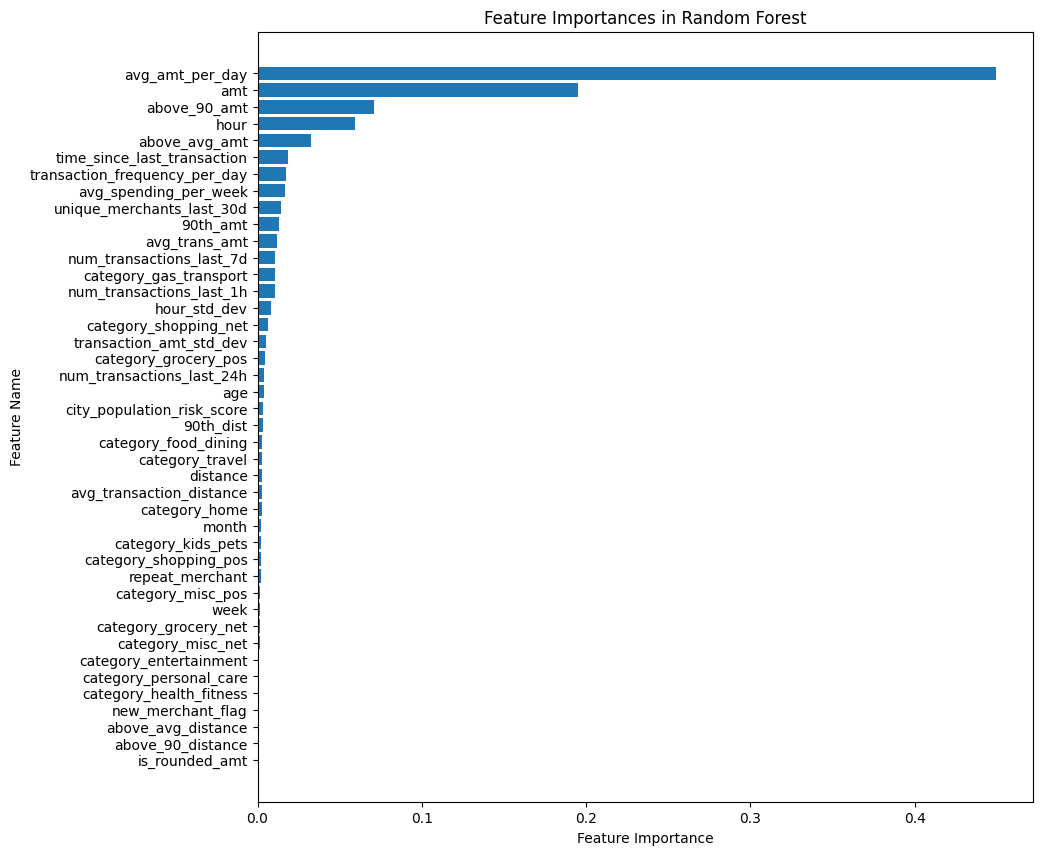

In [ ]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Get the top 15 important features
top_15_features = feature_importance_df.head(15)

# Display them
print(top_15_features)


                          Feature  Importance
19                avg_amt_per_day    0.449172
0                             amt    0.195096
24                   above_90_amt    0.071066
3                            hour    0.059123
23                  above_avg_amt    0.032500
2     time_since_last_transaction    0.018525
7   transaction_frequency_per_day    0.017435
18          avg_spending_per_week    0.016824
17      unique_merchants_last_30d    0.014031
22                       90th_amt    0.012835
20                  avg_trans_amt    0.011867
8        num_transactions_last_7d    0.010693
30         category_gas_transport    0.010609
10       num_transactions_last_1h    0.010413
4                    hour_std_dev    0.008183


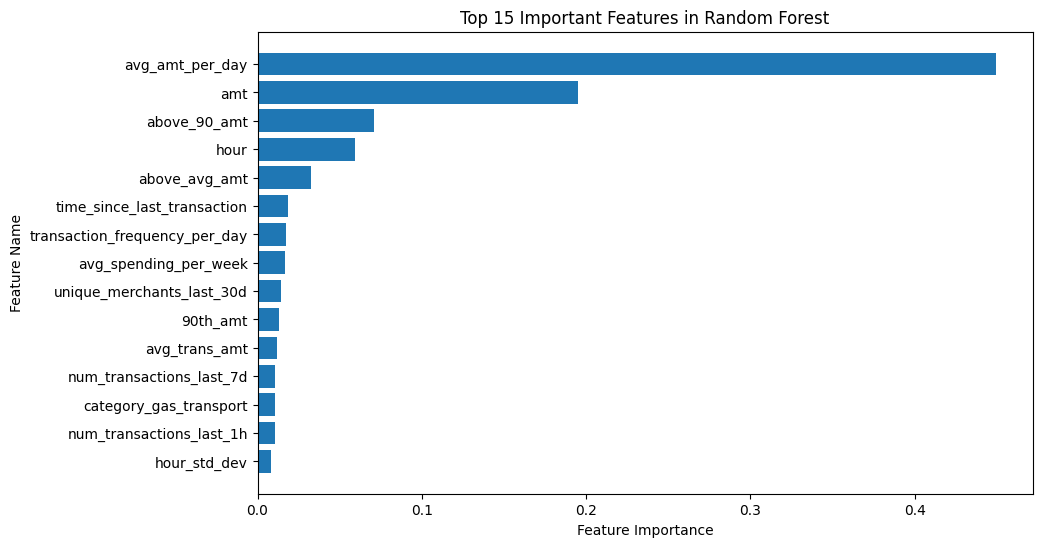

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 15 Important Features in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Get the least 15 important features
least_15_features = feature_importance_df.tail(15)

# Display them
print(least_15_features)


                    Feature  Importance
6                     month    0.002178
35       category_kids_pets    0.002138
40    category_shopping_pos    0.001932
15          repeat_merchant    0.001890
37        category_misc_pos    0.001522
5                      week    0.001477
31     category_grocery_net    0.001433
36        category_misc_net    0.001257
28   category_entertainment    0.001016
38   category_personal_care    0.000948
33  category_health_fitness    0.000867
16        new_merchant_flag    0.000806
13       above_avg_distance    0.000181
14        above_90_distance    0.000172
25           is_rounded_amt    0.000012


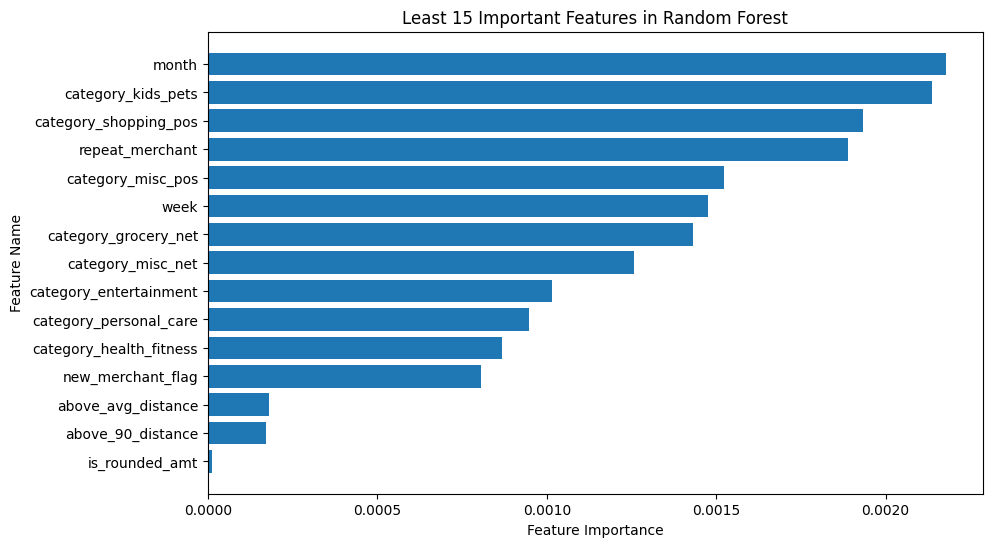

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(least_15_features['Feature'], least_15_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Least 15 Important Features in Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Testing generalization - Model2

We will test generalization by evaluating performance on a validation set.

Split: 80% Train and 20% Validation on (X_train)
* 80% of X_train remains as X_train_final for training.
* 20% of X_train becomes X_val for validation.
* Test set remains untouched for final evaluation.

Outcome:
* If validation accuracy is significantly lower than test accuracy → Overfitting.
* If both accuracies are low → Underfitting.

In [ ]:
from sklearn.model_selection import train_test_split

# Further split the training set into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Print dataset shapes
print("Final Training Set:", X_train_final.shape, y_train_final.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Testing Set (unchanged):", X_test.shape, y_test.shape)


Final Training Set: (829872, 42) (829872,)
Validation Set: (207468, 42) (207468,)
Testing Set (unchanged): (259335, 42) (259335,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model on the final training set
model2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model2.fit(X_train_final, y_train_final)

# Predict on the validation set
y_val_pred = model2.predict(X_val)

# Evaluate performance on validation set
print("Validation Set Performance:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Set Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    206267
           1       0.99      0.85      0.91      1201

    accuracy                           1.00    207468
   macro avg       1.00      0.92      0.96    207468
weighted avg       1.00      1.00      1.00    207468

Confusion Matrix:
 [[206259      8]
 [   182   1019]]


The model is generalizing well because:

* Performance on validation data is similar to test data, meaning the model is not overfitting.
* High recall (85%) for fraud cases indicates it is capturing fraud patterns reasonably well.
* High precision (99%) means very few false positives (legitimate transactions misclassified as fraud).

# SHAP and LIME (For Explainability) for Model1



1. SHAP

In [ ]:
import shap

# Select a random subset (e.g., 100 samples) from X_test
sampled_X_test = X_test.sample(n=100, random_state=42)

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(model1, feature_perturbation="tree_path_dependent")

# Compute SHAP values for test set
shap_values = explainer.shap_values(sampled_X_test)

SHAP values shape for class 1: (100, 42)


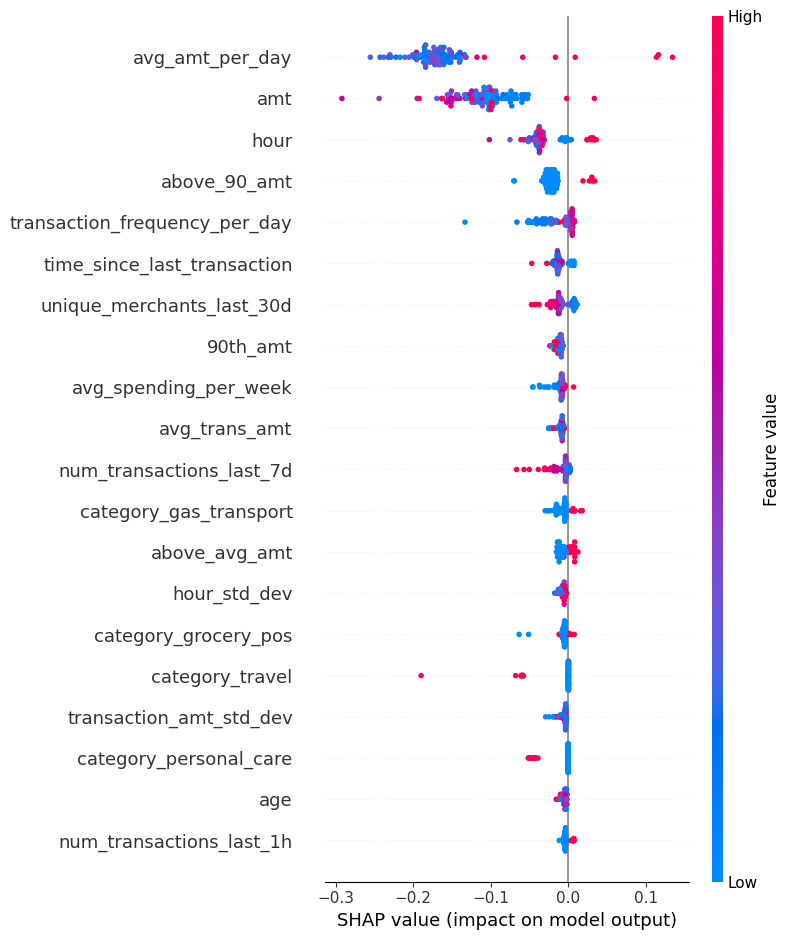

In [ ]:
# Select SHAP values for fraud class (class 1)
shap_values_class_1 = shap_values[:, :, 1]  # Extract only class 1 SHAP values

# Check shape (should be (100, 42))
print("SHAP values shape for class 1:", shap_values_class_1.shape)

# Summary plot
shap.summary_plot(shap_values_class_1, sampled_X_test, feature_names=sampled_X_test.columns)

# The summary plot shows which features impact predictions the most.

Corrected SHAP values shape: (42,)
Feature values shape: (42,)


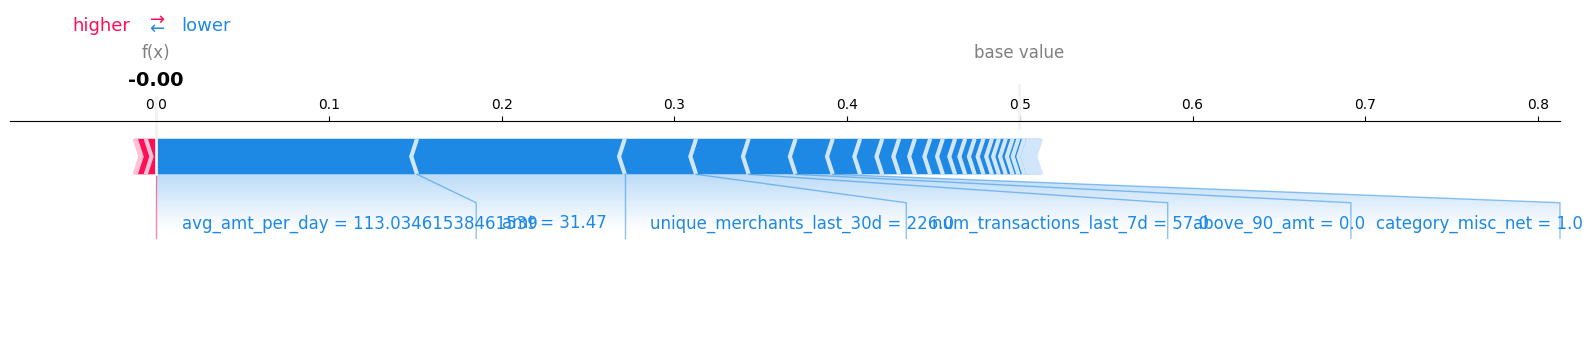

In [ ]:
# The force plot visualizes and explains individual predictions by showing how features push predictions up or down.
# Plot SHAP force plot for a single instance

import shap

# Pick a sample index to visualize
index = 0  # Change if needed

# Extract SHAP values for class 1 (fraud) for the selected sample
shap_values_single = shap_values[index, :, 1]  # Extract SHAP values for fraud class (1)

# Extract feature values for the same sample
sample_features = sampled_X_test.iloc[index, :]

# Check corrected shapes before plotting
print(f"Corrected SHAP values shape: {shap_values_single.shape}")  # Should be (42,)
print(f"Feature values shape: {sample_features.shape}")  # Should be (42,)

# Create force plot
# shap.initjs()
shap.force_plot(
    explainer.expected_value[1],  # Expected value for class 1 (fraud)
    shap_values_single,  # Corrected SHAP values
    sample_features,  # Feature values
    matplotlib=True  # Uses Matplotlib instead of JS, allowing resizing
)

In [ ]:
# # Plot SHAP force plot for multiple samples
shap.initjs()
shap.force_plot(
    explainer.expected_value[1], # Expected value for class 1
    shap_values[:, :, 1],  # Use all samples, not just one
    sampled_X_test, # Feature values
    feature_names=feature_names
)

2. LIME

In [ ]:
!pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Convert dataset to numpy array for LIME
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train_array,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Select a random test instance for LIME explanation
instance_idx = 10  # Change index to analyze different transactions
lime_exp1 = lime_explainer.explain_instance(X_test_array[instance_idx], model1.predict_proba)
print(f"Selected index for LIME explanation: {instance_idx}")
print(f"LIME explanation for selected instance (index {instance_idx}):\n{lime_exp1.as_list()}")

# Show LIME explanations
lime_exp1.show_in_notebook()

Selected index for LIME explanation: 10
LIME explanation for selected instance (index 10):
[('category_gas_transport <= 0.00', -0.03133111065775385), ('avg_amt_per_day > 80.77', 0.025642296181577352), ('amt > 83.14', 0.024500828825275888), ('category_grocery_pos <= 0.00', -0.022435773307445426), ('is_rounded_amt <= 0.00', -0.012640465260779922), ('0.00 < above_avg_amt <= 1.00', -0.0069395491945007945), ('transaction_frequency_per_day <= 3.00', -0.004689457733835914), ('category_misc_pos <= 0.00', 0.004188642112926959), ('above_90_amt <= 0.00', 0.0038188779337203294), ('category_travel <= 0.00', -0.0036372056377698496)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Select a fraud transaction for explanation
fraud_index = y_test[y_test == 1].index[0]  # Pick first fraud case
lime_exp2 = lime_explainer.explain_instance(X_test_array[fraud_index], model1.predict_proba)
print(f"Selected fraud index: {fraud_index}, Actual label: {y_test.loc[fraud_index]}")
print(f"LIME explanation for fraud case:\n{lime_exp2.as_list()}")

# Show LIME explanations
lime_exp2.show_in_notebook()

Selected fraud index: 211099, Actual label: 1
LIME explanation for fraud case:
[('category_gas_transport > 0.00', 0.042464199378889206), ('avg_amt_per_day > 80.77', 0.027563800057893884), ('category_grocery_pos <= 0.00', -0.02119962470448437), ('47.53 < amt <= 83.14', -0.019692079402305253), ('is_rounded_amt <= 0.00', -0.015515601913955115), ('above_avg_amt <= 0.00', 0.006891494359933218), ('category_shopping_net <= 0.00', 0.006771677281700565), ('category_grocery_net <= 0.00', -0.004978035728643924), ('transaction_frequency_per_day <= 3.00', -0.004053864213572664), ('category_travel <= 0.00', -0.003972545287981252)]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Get fraud case indices in `y_test`
fraud_cases = np.where(y_test == 1)[0]  # Converts to 0-based positional indices

# Check how many frauds were predicted correctly
fraud_predictions = y_pred[fraud_cases]
print("Fraud Cases Correctly Predicted:", sum(fraud_predictions))
print("Total Fraud Cases:", len(fraud_cases))
print("Fraud Detection Rate:", sum(fraud_predictions) / len(fraud_cases))

Fraud Cases Correctly Predicted: 1302
Total Fraud Cases: 1501
Fraud Detection Rate: 0.8674217188540972


# Training Weighted Random Forest (Custom) - Model3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Initializing the RandomForest model with custom class_weight
model3 = RandomForestClassifier(class_weight={0: 1, 1: 20}, random_state=42)

# Training the model on the training data
model3.fit(X_train, y_train)

# Predictions on the test set
y_pred = model3.predict(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.86      0.92      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257828      6]
 [   207   1294]]


**Confusion Matrix Comparison (Balanced - Model1 Vs. Custom weights - Model3)**

|  | TN <br><br> (Actual 0 → Predicted 0) | FP <br><br> (Actual 0 → Predicted 1) | FN <br><br> (Actual 1 → Predicted 0) | TP <br><br> (Actual 1 → Predicted 1) | f1-score (1)
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| **Balanced <br><br> {0: 0.5, 1: 86.3}** | 257827 | 7 | 202 | 1299 | 0.93 |
| **Custom <br><br> {0: 1, 1: 20}** | 257828 | 6 | 207 | 1294 | 0.92 |

* False Negatives (FN) increased from 202 → 207
* False Positives (FP) decreased from 7 → 6

AUC-ROC Score: 0.9995


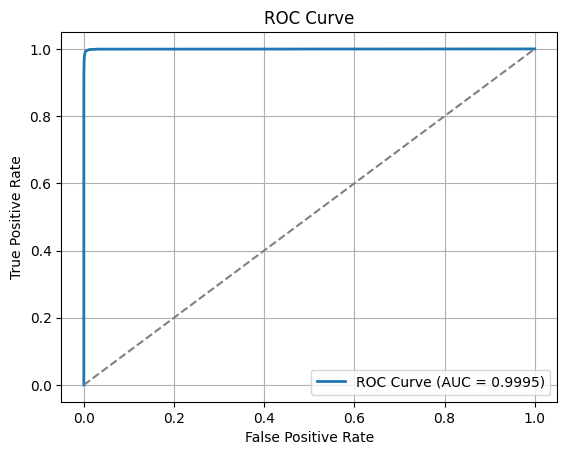

In [ ]:
# AUC-ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (fraud)
y_pred_proba = model3.predict_proba(X_test)[:, 1]

# Compute AUC-ROC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Adjusting Decision Threshold to Decrease False Negatives (FN) on Model1

In [ ]:
# Finding intersection threshold
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get Precision, Recall, and Thresholds
precision, recall, thresholds = precision_r ecall_curve(y_test, y_probs)

# Find the index where Precision and Recall are closest
idx_closest = np.argmin(np.abs(precision - recall))

# Get the corresponding threshold
intersection_threshold = thresholds[idx_closest]

print("Threshold where Precision ≈ Recall:", intersection_threshold)

Threshold where Precision ≈ Recall: 0.25


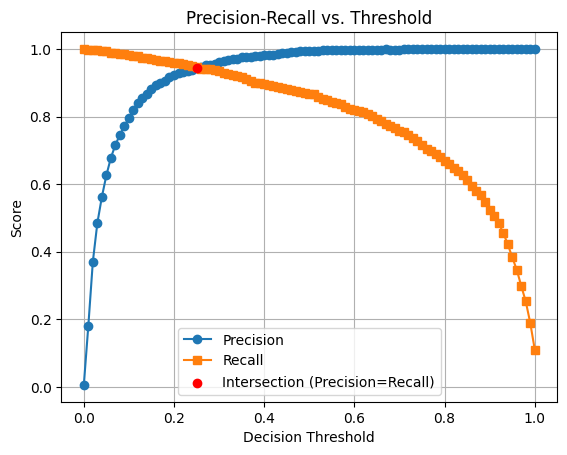

In [ ]:
# Finding the best threshold using Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs. Threshold
plt.plot(thresholds, precision[:-1], label="Precision", marker='o')
plt.plot(thresholds, recall[:-1], label="Recall", marker='s')

# Mark the intersection point
plt.scatter(intersection_threshold, precision[idx_closest], color='red', label="Intersection (Precision=Recall)", zorder=3)

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs. Threshold")
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Predict probabilities instead of labels on Model1:
y_probs = model1.predict_proba(X_test)[:, 1]  # Probabilities for fraud class (1)

# Set a custom decision threshold (e.g., 0.25 instead of 0.5)
custom_threshold = 0.25
y_pred_custom = (y_probs > custom_threshold).astype(int)  # Convert probabilities to binary labels

# Evaluate model
print("Classification Report (Threshold = 0.25):")
print(classification_report(y_test, y_pred_custom))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

Classification Report (Threshold = 0.25):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.94      0.94      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:
[[257755     79]
 [    87   1414]]


**Confusion Matrix Comparison (Balanced Vs. After adjusting decision threshold)**

|  | TN <br><br> (Actual 0 → Predicted 0) | FP <br><br> (Actual 0 → Predicted 1) | FN <br><br> (Actual 1 → Predicted 0) | TP <br><br> (Actual 1 → Predicted 1) | f1-score (1)
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| **Before <br><br> (Threshold = 0.5)** | 257827 | 7 | 202 | 1299 | 0.93 |
| **After <br><br> (Threshold = 0.25)** | 257755 | 79 | 87 | 1414 | 0.94 |

* False Negatives (FN) dropped from 202 → 87
* False Positives (FP) increased from 7 → 79

AUC-ROC Score: 0.9989


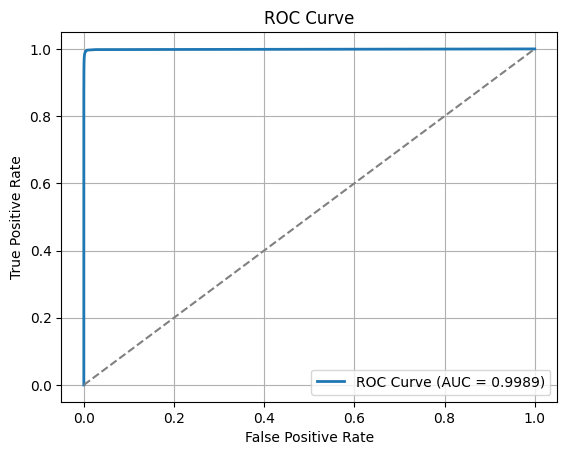

In [ ]:
# AUC-ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities instead of labels on Model1:
y_probs = model1.predict_proba(X_test)[:, 1]  # Probabilities for fraud class (1)

# Compute AUC-ROC Score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Training Random Forest by Combining Class Weights + Threshold Adjustment - Model4

* Class Weights = {0: 1, 1: 29}
* Decision Threshold = 0.25

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

weights_to_test = [{0: 1, 1: 20}, {0: 1, 1: 25}, {0: 1, 1: 28}, {0: 1, 1: 30}]

for weights in weights_to_test:
    print(f"\nTraining Model with Class Weights: {weights}")

    # Train the model
    model4 = RandomForestClassifier(class_weight=weights, random_state=42, n_jobs=-1)
    model4.fit(X_train, y_train)

    # Step 2: Get Probability Predictions
    y_probs = model4.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Step 3: Adjust Decision Threshold
    threshold = 0.25
    y_pred = (y_probs >= threshold).astype(int)

    # Print evaluation metrics
    print(f"\nClassification Report for {weights}:\n", classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix for Class Weights {weights}:\n", confusion_matrix(y_test, y_pred))


Training Model with Class Weights: {0: 1, 1: 20}

Classification Report for {0: 1, 1: 20}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.94      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix for Class Weights {0: 1, 1: 20}:
 [[257759     75]
 [    89   1412]]

Training Model with Class Weights: {0: 1, 1: 25}

Classification Report for {0: 1, 1: 25}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.94      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix for Class Weights {0: 1, 1: 25}:
 [[257761     73]
 [  

# Final Model - Model5

In [ ]:
# With class weights and decision threshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train Model with Class Weights
model5 = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 29}, random_state=42, n_jobs=-1)
model5.fit(X_train, y_train)

# Predictions on the test set
# Intersection threshold by default is 0.5
y_pred5a = model5.predict(X_test)

# Step 2: Get Probability Predictions
y_probs5 = model5.predict_proba(X_test)[:, 1]  # Get fraud probabilities

# Step 4: Evaluate Performance
print("Classification Report for {0: 1, 1: 29}:\n", classification_report(y_test, y_pred5a))
print("Confusion Matrix for Class Weights {0: 1, 1: 29}:\n", confusion_matrix(y_test, y_pred5a))

Classification Report for {0: 1, 1: 29}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.87      0.93      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix for Class Weights {0: 1, 1: 29}:
 [[257828      6]
 [   199   1302]]


In [ ]:
# Finding intersection threshold on weight 29
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get Precision, Recall, and Thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs5)

# Find the index where Precision and Recall are closest
idx_closest = np.argmin(np.abs(precision - recall))

# Get the corresponding threshold
intersection_threshold = thresholds[idx_closest]

print("Threshold where Precision ≈ Recall:", intersection_threshold)

Threshold where Precision ≈ Recall: 0.24


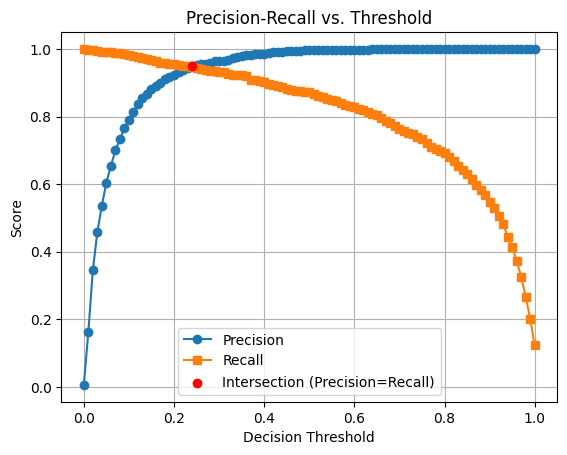

In [ ]:
# Finding the best threshold using Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs5)

# Plot Precision-Recall vs. Threshold
plt.plot(thresholds, precision[:-1], label="Precision", marker='o')
plt.plot(thresholds, recall[:-1], label="Recall", marker='s')

# Mark the intersection point
plt.scatter(intersection_threshold, precision[idx_closest], color='red', label="Intersection (Precision=Recall)", zorder=3)

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs. Threshold")
plt.grid()
plt.show()

In [ ]:
# Step 3: Adjust Decision Threshold = 0.24
y_pred5b = (y_probs5 >= intersection_threshold).astype(int)

# Step 4: Evaluate Performance
print("Classification Report for {0: 1, 1: 29}:\n", classification_report(y_test, y_pred5b))
print("Confusion Matrix for Class Weights {0: 1, 1: 29}:\n", confusion_matrix(y_test, y_pred5b))

Classification Report for {0: 1, 1: 29}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.95      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix for Class Weights {0: 1, 1: 29}:
 [[257757     77]
 [    80   1421]]


In [ ]:
# Step 3: Adjust Decision Threshold = 0.25
intersection_threshold5 = 0.25
y_pred5c = (y_probs5 >= intersection_threshold5).astype(int)

# Step 4: Evaluate Performance
print("Classification Report for {0: 1, 1: 29}:\n", classification_report(y_test, y_pred5c))
print("Confusion Matrix for Class Weights {0: 1, 1: 29}:\n", confusion_matrix(y_test, y_pred5c))

Classification Report for {0: 1, 1: 29}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.94      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix for Class Weights {0: 1, 1: 29}:
 [[257762     72]
 [    83   1418]]


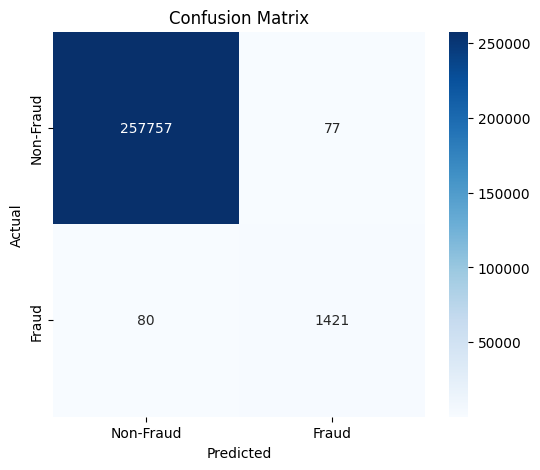

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred5b)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC-ROC Score: 0.9989


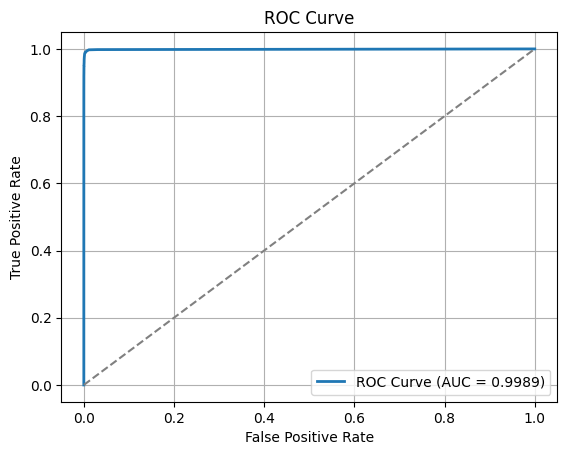

In [ ]:
# AUC-ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute AUC-ROC Score
auc_score = roc_auc_score(y_test, y_probs5)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs5)
plt.plot(fpr, tpr, lw=2, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Predict on test data
# y_pred5b = model5.predict(X_test)

# Print the first 10 predictions
print(y_pred5b[:10])

[0 0 0 0 0 0 0 0 0 0]


# Save Model5

In [ ]:
import joblib
from google.colab import files
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Save Only the Model and Threshold
model_data = {
    "model": model5,
    "threshold": 0.24  # Fixed threshold
}

joblib.dump(model_data, "RandomForest.pkl")
print("Model saved successfully!")

# Download the saved model file
files.download("RandomForest.pkl")

Model saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved model
model_data = joblib.load("RandomForest.pkl")

# Extract model and prediction function
model5_loaded = model_data["model"]
predict_function = model_data["predict_function"]

# Make Predictions on New Data
y_new_pred = predict_function(model5_loaded, X_new)
print("Fraud Predictions:", y_new_pred)

# Extra work: calculation threshold on weight 31 (Same as 29) - Modely
- threshold calculation result = 0.24
- my custom threshold = 0.25
- And will check results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train Model with Class Weights
modely = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 31}, random_state=42, n_jobs=-1)
modely.fit(X_train, y_train)

# Step 2: Get Probability Predictions
y_probsy = modely.predict_proba(X_test)[:, 1]  # Get fraud probabilities

In [ ]:
# Finding intersection threshold
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get Precision, Recall, and Thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probsy)

# Find the index where Precision and Recall are closest
idx_closest = np.argmin(np.abs(precision - recall))

# Get the corresponding threshold
intersection_thresholdy = thresholds[idx_closest]

print("Threshold where Precision ≈ Recall:", intersection_thresholdy)

Threshold where Precision ≈ Recall: 0.24


In [ ]:
# Step 3: Adjust Decision Threshold
y_predq = (y_probsy >= intersection_thresholdy).astype(int)

# Step 4: Evaluate Performance
print("Classification Report for {0: 1, 1: 31}:\n", classification_report(y_test, y_predq))
print("Confusion Matrix for Class Weights {0: 1, 1: 31}:\n", confusion_matrix(y_test, y_predq))

Classification Report for {0: 1, 1: 31}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.94      0.95      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix for Class Weights {0: 1, 1: 31}:
 [[257749     85]
 [    80   1421]]


In [ ]:
# Step 3: Adjust Decision Threshold
intersection_threshold = 0.25
y_predw = (y_probsy >= intersection_threshold).astype(int)

# Step 4: Evaluate Performance
print("Classification Report for {0: 1, 1: 31}:\n", classification_report(y_test, y_predw))
print("Confusion Matrix for Class Weights {0: 1, 1: 31}:\n", confusion_matrix(y_test, y_predw))

Classification Report for {0: 1, 1: 31}:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.94      0.94      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.97      0.97    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix for Class Weights {0: 1, 1: 31}:
 [[257754     80]
 [    86   1415]]


**Confusion Matrix Comparison**

|  | TN <br><br> (Actual 0 → Predicted 0) | FP <br><br> (Actual 0 → Predicted 1) | FN <br><br> (Actual 1 → Predicted 0) | TP <br><br> (Actual 1 → Predicted 1) | Precision | Recall | f1-score (1) |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| **Class Weights = {0: 1, 1: 20} <br><br> Decision Threshold = 0.25** | 257759 | 75 | 89 | 1412 | 0.95 | 0.94 | 0.95 |
| **Class Weights = {0: 1, 1: 25} <br><br> Decision Threshold = 0.25** | 257761 | 73 | 87 | 1414 | 0.95 | 0.94 | 0.95 |
| **Class Weights = {0: 1, 1: 28} <br><br> Decision Threshold = 0.25** | 257763 | 71 | 88 | 1413 | 0.95 | 0.94 | 0.95 |
| **Class Weights = {0: 1, 1: 29} <br><br> Decision Threshold = 0.5** | 257754 | 80 | 86 | 1415 | 0.95 | 0.94 | 0.94 |
| **Class Weights = {0: 1, 1: 29} <br><br> Decision Threshold = 0.24** | 257757 | 77 | 80 | 1421 | 0.95 | 0.95 | 0.95 |
| **Class Weights = {0: 1, 1: 29} <br><br> Decision Threshold = 0.25** | 257762 | 72 | 83 | 1418 | 0.95 | 0.94 | 0.95 |
| **Class Weights = {0: 1, 1: 30} <br><br> Decision Threshold = 0.25** | 257758 | 76 | 84 | 1417 | 0.95 | 0.94 | 0.95 |
| **Class Weights = {0: 1, 1: 31} <br><br> Decision Threshold = 0.24** | 257749 | 85 | 80 | 1421 | 0.94 | 0.95 | 0.95 |
| **Class Weights = {0: 1, 1: 31} <br><br> Decision Threshold = 0.25** | 257754 | 80 | 86 | 1415 | 0.95 | 0.94 | 0.94 |

# K-Fold Cross Validation on Model5

* Use k-fold cross-validation to evaluate the model on different data splits.
* Ensures the model is not just performing well on one specific training set.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Define number of splits
k = 5 # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Store results
cv_reports = []
cv_conf_matrices = []
auc_roc_folds = []

# Perform K-Fold CV
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nTraining on Fold {fold}...")

    # Split the data
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Train model4 again for CV
    model5_cv = RandomForestClassifier(class_weight={0: 1, 1: 29}, random_state=42, n_jobs=-1)
    model5_cv.fit(X_train_fold, y_train_fold)

    # Predictions
    y_val_pred = model5_cv.predict(X_val_fold)
    y_val_probs = model5_cv.predict_proba(X_val_fold)[:, 1]  # Get probabilities for AUC

    # Evaluation
    report = classification_report(y_val_fold, y_val_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    auc_score = roc_auc_score(y_val_fold, y_val_probs)

    # Store results
    cv_reports.append(report)
    cv_conf_matrices.append(conf_matrix)
    auc_roc_folds.append(auc_score)

    print(f"Fold {fold} Classification Report:\n", classification_report(y_val_fold, y_val_pred))
    print(f"Fold {fold} Confusion Matrix:\n", conf_matrix)
    print(f"Fold {fold} AUC-ROC: {auc_score:.4f}")

# Calculate and display the average performance across all folds
avg_precision = np.mean([r['1']['precision'] for r in cv_reports])
avg_recall = np.mean([r['1']['recall'] for r in cv_reports])
avg_f1 = np.mean([r['1']['f1-score'] for r in cv_reports])
avg_accuracy = np.mean([r['accuracy'] for r in cv_reports])
mean_auc_roc = np.mean(auc_roc_folds)

print("\n=== Cross-Validation Results ===")
print(f"Avg Precision: {avg_precision:.4f}")
print(f"Avg Recall: {avg_recall:.4f}")
print(f"Avg F1-score: {avg_f1:.4f}")
print(f"Avg Accuracy: {avg_accuracy:.4f}")
print(f"Mean AUC-ROC: {mean_auc_roc:.4f}")


Training on Fold 1...
Fold 1 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.86      0.93      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335

Fold 1 Confusion Matrix:
 [[257831      3]
 [   205   1296]]
Fold 1 AUC-ROC: 0.9982

Training on Fold 2...
Fold 2 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.99      0.86      0.92      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.93      0.96    259335
weighted avg       1.00      1.00      1.00    259335

Fold 2 Confusion Matrix:
 [[257826      8]
 [   205   1296]]
Fold 2 AUC-ROC: 0.9995

Training on Fold 3...
Fold 3 Classification Report:
               pr

NameError: name 'np' is not defined

**Confusion Matrix Comparison**

|  | TN <br><br> (Actual 0 → Predicted 0) | FP <br><br> (Actual 0 → Predicted 1) | FN <br><br> (Actual 1 → Predicted 0) | TP <br><br> (Actual 1 → Predicted 1) | Precision | Recall | f1-score (1) |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| Fold 1 | 257831 | 3 | 205 | 1296 | 1 | 0.86 | 0.93 |
| Fold 2 | 257826 | 8 | 205 | 1296 | 0.99 | 0.86 | 0.92 |
| Fold 3 | 257824 | 10 | 182 | 1319 | 0.99 | 0.88 | 0.93 |
| Fold 4 | 257825 | 9 | 184 | 1317 | 0.99 | 0.88 | 0.93 |
| Fold 5 | 257821 | 12 | 176 | 1326 | 0.99 | 0.88 | 0.93 |




In [ ]:
# # Perform cross-validation using cross_val_score (for AUC-ROC)
# auc_roc_scores = cross_val_score(RandomForestClassifier(class_weight={0: 1, 1: 29}, random_state=42, n_jobs=-1),
#                                  X, y, cv=skf, scoring='roc_auc')

# print(f"\nAUC-ROC Scores Across Folds: {auc_roc_scores}")
# print(f"Mean AUC-ROC (cross_val_score): {auc_roc_scores.mean():.4f}")

# Hyperparameter Tuning
Using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define a reduced hyperparameter space
param_dist = {
    'n_estimators': np.arange(50, 251, 50),  # Reduced upper limit
    'max_depth': np.arange(10, 31, 5),  # Narrowed range
    'min_samples_split': np.arange(2, 11, 2),  # Reduced options
    'min_samples_leaf': np.arange(1, 6),  # Reduced range
    'max_features': ['sqrt', 'log2'],  # Removed None to avoid slowdowns
    'bootstrap': [True, False],
    'class_weight': [{0: 1, 1: x} for x in [27, 29, 31]]  # Smaller set
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Set up Randomized Search with fewer iterations
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Reduced iterations
    scoring='roc_auc',
    cv=3,  # Reduced from 5 to 3 for speed
    verbose=1,  # Less verbose to reduce output clutter
    random_state=42,
    n_jobs=-1
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters Found:", best_params)

# Train final model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_rf_model.predict(X_test)
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))
print(f"Test AUC-ROC Score: {roc_auc_score(y_test, y_probs):.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Hyperparameters Found: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': {0: 1, 1: 31}, 'bootstrap': True}

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.91      0.94      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.95      0.97    259335
weighted avg       1.00      1.00      1.00    259335

Test AUC-ROC Score: 0.9998
